## Исследование данных о российском кинопрокате



**Цель исследования**

Необходимо изучить рынок российского кинопроката и выявить текущие тренды, а также уделить внимание фильмам, которые получили государственную поддержку, и ответить на вопрос, насколько такие фильмы интересны зрителю.

**Ход исследования**

Данные для исследования  опубликованы на портале открытых данных Министерства культуры Российской Федерации (заказчик исследования).
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
Мы будем работать с данными из двух файлов:
- /datasets/mkrf_movies.csv — данные о прокатных удостоверениях;
- /datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах. 

Нам известно, что у одного фильма может быть несколько прокатных удостоверений. А столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

О качестве данных ничего не известно. Поэтому перед исследованием данных понадобится их обзор.

Мы проверим данные на ошибки, и оценим их влияние на исследование; затем, на этапе предобработки изучим возможность исправить самые критичные ошибки в данных.

Далее проведем необходимые вычисления, на основании которых проанализируем данные и, таким образом, исследование пройдёт в четыре этапа:

- Обзор данных;
- Предобработка данных:
  - Проверим, есть ли в данных пропуски и дубликаты;
  - Изучим столбцы, которые содержат категориальные значения; 
  - Изучим столбцы, которые хранят количественные значения. 
- Необходимые вычисления:
  - Добавим новые столбцы:
    - С информацией о годе проката;
    - Два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;
    - Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.
- Исследовательский анализ данных:
  - Посмотрим, сколько фильмов выходило в прокат каждый год.  Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных;
  - Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
  - С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года. Сравним значения и сделаем выводы;
  - Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?
  - Исследуем фильмы, которые получили гос. поддержку. Поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

### Шаг 1. Откроем файлы с данными и объедим их в один датафрейм. 

In [1]:
# Импорт библиотек.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Читаем файл, содержащий информацию о прокатных удостоверениях, и сохраняем данные в переменную data_movies.
try:
    data_movies = pd.read_csv('/Users/marina/CSV_files/mkrf_movies.csv')
except:
    data_movies = pd.read_csv('data_movies.csv')

In [3]:
# Выводим на экран первые 2 строки датафрейма.
data_movies.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"


In [4]:
# Читаем файл, содержащий информацию о прокате в российских кинотеатрах, и сохраняем данные в переменную data_shows.
try:
    data_shows = pd.read_csv('/Users/marina/CSV_files/mkrf_shows.csv')
except:
    data_shows = pd.read_csv('mkrf_shows.csv')

In [5]:
# Выводим на экран первые 2 строки датафрейма.
data_shows.head(2)

,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0


In [6]:
# Выводим основную информацию по обоим датафреймам.
data_movies.info()
print()
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В таблице data_movies 15 столбцов, 7486 строк.

Согласно документации к данным:
1. title — название фильма, object;
2. puNumber — номер прокатного удостоверения, object ;
3. show_start_date — дата премьеры фильма, object;
4. type — тип фильма, object;
5. film_studio — студия-производитель, object;
6. production_country — страна-производитель, object;
7. director — режиссёр, object;
8. producer — продюсер, object;
9. age_restriction — возрастная категория, object;
10. refundable_support — объём возвратных средств государственной поддержки, float64;
11. nonrefundable_support — объём невозвратных средств государственной поддержки, float64;
12. financing_source — источник государственного финансирования, object;
13. budget — общий бюджет фильма, float64;
14. ratings — рейтинг фильма на КиноПоиске, object;
15. genres — жанр фильма, object .

Стилистика названия столбца puNumber нарушена. Тип данных в столбце - object, поменяем его на вещественный.

В столбце show_start_date поменяем тип данный на формат  datetime64.

В столбце ratings поменяем object на float64.

В таблице data_shows 2 столбца, 3158 строк.

Согласно документации к данным:
1. puNumber — номер прокатного удостоверения, int64;
2. box_office — сборы в рублях, float64.

Стилистика названий столбца puNumber нарушена.

In [7]:
# Выведем краткую информацию по количеству строк и столбцов в этих датафреймах.
print('Shape of the "data_movies" table: ', data_movies.shape)
print('Shape of the "data_shows" table: ', data_shows.shape)

Shape of the "data_movies" table:  (7486, 15)
Shape of the "data_shows" table:  (3158, 2)


Нам необходимо соединить два датафрейма data_movies и data_shows в один. Объединять будем по общему столбцу puNumber, он общий у обоих датафреймов. Значит при объединении должен получиться датафрейм из 16 столбцов и 7486 строк Для начала приведем тип данных в нем в датафрейме data_movies к float64.

In [8]:
# Для перевода строковых значений в числа воспользуемся функцией to_numeric.
data_movies['puNumber'] = pd.to_numeric(data_movies['puNumber'], errors = 'coerce')

In [9]:
# Объединим датафреймы в один с помощью функции merge().
data_movies = data_movies.merge(data_shows, on = 'puNumber', how = 'left')
# Переименуем новый датафрейм в data для краткости  и выведем на экран первые 2 строки.
data = data_movies
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


In [10]:
# Проведем проверку количества строк и столбцов в объединенном датафрейме.
print('Shape of the "data" table: ', data.shape)

Shape of the "data" table:  (7486, 16)


In [11]:
# Посмотрим название столбца с индексами в датафрейме.
print(data.index.name)

None


In [12]:
# Присвоим столбцу с индексами новое имя.
data.index.rename('index', inplace = True )

In [13]:
# Выводим описание всех числовых данных.
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.485000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351966e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.835292e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


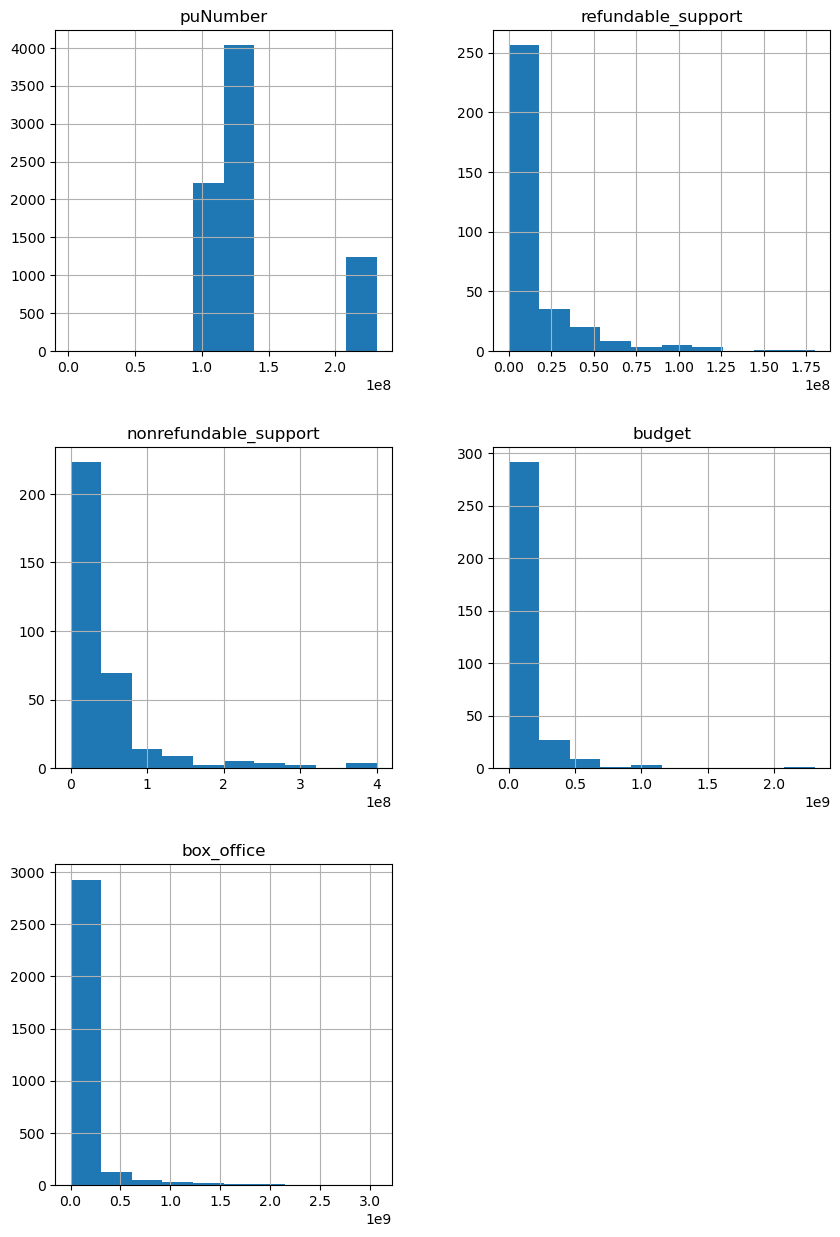

In [14]:
# Построим  общую гистограмму для всех числовых столбцов таблицы. 
data.hist(figsize = (10, 15));

##### **Вывод:**

На данном этапе мы:
- прочитали два файла с данными;
- изменили тип данных в столбце puNumber в data_movies на float64; 
- объединили два датафрейма в один - data и проверили, что все объекты из mkrf_movies в него вошли: получили 16 столбцов и 7486 строк;
- вывели о нем общую информацию.

Впереди предобработка данных.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

In [15]:
# Проверим типы данных в датафрейме data.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [16]:
# Приведем название столбцa puNumber к единой стилистике.
data = data.rename(
    columns = {'puNumber': 'pu_number'}
)
data.columns  

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [17]:
# Для приведения типа данных в этом столбце к int64, проверим его сначала на пропуски.
data['pu_number'].isna().sum()

1

Пропущенное значение всего одно в массиве из 7486 строк. Удалим эту строку.

In [18]:
# Удаляем строку с пропуском.
data.dropna(subset = ['pu_number'], inplace = True)

In [19]:
# Меняем тип данных в столбце на int64.
data['pu_number'] = data['pu_number'].astype(int)

In [20]:
# Преобразуем дату в столбце show_start_date на  формат datetime64.
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%d')

In [21]:
# Проверим уникальные значения в столбце ratings.
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [22]:
# Удалим символ % из столбца ratings.
data['ratings'] = data['ratings'].str.replace('%', '')

In [23]:
# Изменим тип данных в столбце ratings на float64.
data['ratings'] = pd.to_numeric(data['ratings'], errors = 'coerce')

In [24]:
# Округлим значения в стобцах с вещественным типом данных до одной цифры после запятой.
pd.set_option('display.float_format', '{:.1f}'.format)

#### Шаг 2.2. Изучим пропуски в датафрейме

In [25]:
# Создаем копию датасета до преобразований
temp = data.copy()  
len(temp)

7485

In [26]:
# Выведем количество пропущенных значений для каждого стобца и отсортируем по возрастанию.
data.isna().sum().sort_values()

title                       0
pu_number                   0
show_start_date             0
type                        0
age_restriction             0
production_country          2
director                    9
film_studio                18
producer                  568
ratings                   966
genres                    975
box_office               4327
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
dtype: int64

In [27]:
# Посмотрим долю пропусков данных в столбцах.
pd.DataFrame(round(data.isna().mean() * 100, 1)).style.background_gradient('coolwarm')

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.200000
production_country,0.000000
director,0.100000
producer,7.600000
age_restriction,0.000000
refundable_support,95.600000


В 11 из 16 столбцов есть пропущенные значения. В столбцах refundable_support, nonrefundable_support, budget, financing_source пропущено по 96.6% значений, почти все. В стобце box_office пропущено больше половины значений - 57.8%. Это очень  много. Проанализируем пропуски и посмотрим, что можно с ними сделать для дальнейшей работы.

Столбцы production_country, director и film_studio имеют 2, 9 и 18 пропусков соответственно. Восстановить эти значения, конечно, можно, поискав информацию про все фильмы, где есть пропуски в этих столбцах, и заполнив их вручную нужной информацией, но  это не наша цель в этом исследовании. Поэтому заменим пропущенные значения в этих столбцах значением unknown, чтобы не удалять эти строки.

In [28]:
# Заменяем пропуски в столбце production_country на unknown.
data['production_country'] = data['production_country'].fillna(value = 'unknown')

In [29]:
# Заменяем пропуски в столбце director на unknown.
data['director'] = data['director'].fillna(value = 'unknown')

In [30]:
# Заменяем пропуски в столбце film_studio на unknown.
data['film_studio'] = data['film_studio'].fillna(value = 'unknown')

В столбце producer пропусков больше: 7,6%. Но поступим, пожалуй, также как и с предыдущими столбцами.

In [31]:
# Заменяем пропуски в столбце producer на unknown.
data['producer'] = data['producer'].fillna(value = 'unknown')

Столбцы refundable_support, nonrefundable_support, budget, financing_source имеют 95.6% пропусков в данных. Нам известно, что столбцец budget заполнен только для тех фильлмов, которые имели государственную поддержку. Остальные три столбца также так или иначе связаны с гос. поддержкой, логично предположить, что данные в этих столбцах будут заполнены в одних и тех же строках относительно одних и тех же фильмов, но это надо проверить в дальнейшем.  Фильмов, получивших гос. финансирование всего 4.4%. Количество пропусков слишком велико, чтобы удалить их. Заполним пропуски на unknown в столбце financing_source. А в остальных стобцах посмотрю, какие есть минимальные значения, если есть 0, то на него мы пропуски заменить не сможем, заполненная  нулем ячейка в столбце refandable_support может означать, что гос.поддержка, например, была, но возвратных средств не было.

In [32]:
# Смотрим минимальное значение в столбце refundable_support.
data['refundable_support'].min()

0.0

In [33]:
# Смотрим минимальное значение в столбце nonrefundable_support.
data['refundable_support'].min()

0.0

In [34]:
# Смотрим минимальное значение в столбце budget.
data['budget'].min()

0.0

Так и есть. Минимальные значение в столбцах нули. Пока оставим эти данные как есть.

In [35]:
# Заменяем пропуски в столбце financing_source на unknown.
data['financing_source'] = data['financing_source'].fillna(value = 'unknown')

In [36]:
# Снова посмотрим на уникальные данные в столбце ratings.
data['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

В этом столбце помимо пропусков,  мы видим два вида записи рейтинга. Первый в баллах (Кинопоиск использует 10ти бальную систему), второй в процентах (знак процента мы удалили выше, перед изменением типа данных в столбце). Заменим данные в процентах на бальную систему записи. Для этого заменим проценты в этих строках на их доли от 10 баллов. 

In [37]:
# Заменим запись в процентах на 10-бальную.
data['ratings'] = data['ratings'].map(lambda x: x if x < 10 else x / 10)

In [38]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

В столбце ratings 967 пропусков. Я считаю, что  удалить мы их не можем, это больше 10%  всех данных. Заменить медианой тоже, даже если типизировать фильмы по жанрам, посчитать средний рейтинг, например, по комедиям, и заполнить этим значением пропуски, будет некорректно. Главное в рейтинге  - человеческий фактор, что одному хорошо, другому не понравится. Это данные могут быть важны для нашего исследования. Оставим их пока как есть.

В столбце genres 976 пропусков, значения этих данных скорее всего не приниципиальны для нашего исследования, заменим их на unknown.

In [39]:
# Заменим пропуски в столбце genres на unknown.
data['genres'] = data['genres'].fillna(value = 'unknown')

В столбце box_office 57.8% пропущенных значений. Проверим минимальное значение в нем, так же как в budget.

In [40]:
data['box_office'].min() 

0.0

Также присутствует 0, оставим как есть пока.

In [41]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source            0
ratings                   966
genres                      0
box_office               4327
dtype: int64

#### Шаг 2.3. Изучим дубликаты в датафрейме

In [42]:
# Проверим данные на наличие явных дубликатов.
data.duplicated().sum()

0

Явных дублирующихся строк не найдено.

Дубликаты (явные и неявные) могут возникнуть из-за ошибок при внесении данных, отсутствия единого стиля при заполнении (могли заполнять разные люди в разное время, разного регистра, разных языков, использования различных симвовов, разных кавычек, лишних пробелов и др.), технических сбоев и т.д.

Имеет смысл посмотреть столбцы по отдельности на наличие явных дубликатов и проанализировать данные в них, что мы и сделаем ниже. 

In [43]:
# Проверим данные в столбце  title на наличие явных дубликатов.
data['title'].duplicated().sum()

714

In [44]:
# Посмотрим на 20 строк с этими дубликатами.
data[data['title'].duplicated(keep = False)].head(20)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.7,"боевик,драма,криминал",NaN
33,Перелом,221006016,2016-02-09 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Касл Рок Инте...",США-Германия,Грегори Хоблит,Чарльз Уэйнсток,«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.7,"триллер,драма,криминал",NaN
34,Мисс Поттер,221011915,2015-04-03 12:00:00+00:00,Художественный,"Феникс Пикчерз, Дэвид Киршнер Продакшнз, Айл о...",США - Великобритания,Крис Нунан,"Дэвид Киршнер, Майк Медэвой, Арнольд Мессер, К...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,7.3,"драма,мелодрама,биография",NaN
37,Молчи в тряпочку,221012015,2015-04-03 12:00:00+00:00,Художественный,"Саммит Интертейнмент, Айл оф Мэн Филм, Эйзур Ф...",Великобритания,Найл Джонсон,"Мэтью Пэйн, Джулия Пэло",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.1,"комедия,криминал",NaN
40,Алекс и Эмма,221005015,2015-02-25 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,6.4,"мелодрама,комедия",NaN


В целом по столбцу явных дубликатов 714. Если смотреть глазами, то названия фильмов одинаковые на вид, например, 2-4 строки: Особо опасен, 40-41: Алекс и Эмма...

In [45]:
# Выведем информацию по cтрокам 1 и 2.
data.loc[2:3]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN


In [46]:
# Выведем информацию по cтрокам 40 и 41.
data.loc[40:41]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
40,Алекс и Эмма,221005015,2015-02-25 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,6.4,"мелодрама,комедия",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,6.4,"мелодрама,комедия",NaN


Видим, что у них у всех разные даты запуска на экраны и разные номера прокатных удостоверений, есть незначительные различия и в других столбцах. Вот и еще одна возможная причина возникновения дубликатов - разные номера прокатных удостоверений у одного и того же фильма. Удалять такие дубликаты я не буду. Возможно, что под разными прокатными удостоверениями один фильм мог собрать разную кассу.

In [47]:
# Проверим данные в столбце  pu_number  на наличие явных дубликатов.
data['pu_number'].duplicated().sum()

2

In [48]:
# Посмотрим на строки с этими дубликатами.
data[data['pu_number'].duplicated(keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,6.8,"комедия,криминал",NaN


В первом случае мы видим два разных фильма, но с одним номером прокатного удостоверения, такого быть не должно. Судя по тому, что индексы у фильмов идут один за другим, скорее всего, это техническая ошибка при заполнении, что-то вроде copy+paste. Думаю, что в нашем иследовании номер прокатного удостоверения не очень принципиальный вопрос, оставлю данные без изменения.

Во втором случае речь идет об одном и том же фильме. Явных дубликатов в датафрейме не нашлось, потому что есть разница в написании имен директора, продюсера, названии студии и ограничения по возрасту. Я удалю строку с индексом 5067.

In [49]:
# Удаляем строку с индексом 5067.
data = data.drop(index = 5067)

In [50]:
# Проверяем данные в столбце  show_start_date на наличие явных дубликатов.
data['show_start_date'].duplicated().sum()

5520

В данном столбце нет смысла искать дубликаты дальше. В один и тот же день могло выйти в прокат n-ое количество фильмов, это нормально.

In [51]:
# Проверяем данные в столбце  type на наличие явных дубликатов.
data['type'].duplicated().sum()

7476

В этом столбце аналогично, типов мало, фильмов много, типы имеют право повторяться.

Считаю, что в остальных столбцах нет смысла искать дубликаты, они там точно будут и много. Уникальные значения ограничены и они имеют право повторяться (название студии, режисер, продюсер, жанр, рейтинг и т.д.)

#### Шаг 2.4. Изучим категориальные значения

In [52]:
# Изучим уникальные значения в стобце с title.
print(data['title'].unique())
## Считаем количество уникальных значений.
len(data['title'].unique())

['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']


6771

Посмотрим на выборку по названиям фильмов в таблице в целом.

In [53]:
data['title'].sort_values().head(60)

index
6188                                             Я ПРЕПОД
1968                                     "SOS" над тайгой
4696                                  "V" значит вендетта
6757    "АРТиШОК" анимационный альманах авторских фильмов
2549                       "Бежин луг" Сергея Эйзенштейна
5929               "Державная" Размышления 100 лет спустя
6756    "Зеленое яблоко" анимационный альманах выпуск № 7
7376           "Машины песенки". Серия "Опять Новый Год!"
839                                                "Море"
6665    "Сезон дождей", "Диета Матроскина", "Шарик хоч...
5303                                   "Старый" Новый год
1437    "Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз...
7447          "Фееринки". Серия "Фантик спешит на помощь"
6283    "Хороший день", "Бог из машины/Deus EX", "Голо...
6796    "Чудовище из Простоквашино", "Ген героя", "Нен...
2979                                    #ВСЁ_ИСПРАВИТЬ!?!
6943                                        #Москва-Руаян
6447    

Видим на небольшой выборке, что стиль записи разный. Где-то названия в кавычках, где-то без. В некоторых названиях соседствуют заглавные и строчные буквы, непонятно, это оригинальное название или ошибка, есть названия целиком из заглавных букв, есть с разными символами перед названием, например #. Но если погуглить, например, #ВСЁ_ИСПРАВИТЬ!?!, #Москва-Руаян, то фильмы с таким написанием названий действительно существуют. Тут даже не буду пытаться что-то исправлять.

То же касается и кавычек. Где-то (например, "V" значит вендетта) они действительно необходимы, а где-то ("Чудовище из Простоквашино", "Ген героя") вероятно нет, но удалить все кавычки мы не можем. Так что тоже оставляем все как есть.

На этой небольшой выборке на строках 778 и 779 виден, скорее всего, неявный дубликат(10 лет спустя и 10 лет спустя.). Я могла бы удалить его, но не вижу смысла для данного исследования. Удалить все точки из столбца я не могу, так же как кавычки, потому что в некоторых фильмах они действительно являются частью названия, но и выловить "глазами" все подобные случаи, тоже не могу. Поэтому оставляю, как еcть.

In [54]:
# Изучим уникальные значения в стобце с type.
print(data['type'].unique())
## Считаем количество уникальных значений.
len(data['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']


8

В столбце type видим два неявных дубликата. 'Художественный' и '  Художественный' с  лишним пробелом слева, то же самое с 'Анимационный'. Исправим это.

In [55]:
data['type'] = data['type'].str.lstrip(' ')
len(data['type'].unique())

6

In [56]:
# Изучим уникальные значения в стобце с film_studio.
print(data['film_studio'].unique())
## Считаем количество уникальных значений.
len(data['film_studio'].unique())

['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента '
 'Никелодеон Анимейшн Студиос, Спин Мастер'
 'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"']


5491

In [57]:
# Посмотрим на выборку из столбца.
data['film_studio'].head(20)

index
0     Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...
1                                 Киностудия "Мосфильм"
2     Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
3     Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
4     Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
5                                 Киностудия "Мосфильм"
6                                 Киностудия "Мосфильм"
7     Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...
8                        Пульсар Продюксьон, ТФ1 Фильм 
9                Киностудия "Мосфильм", Телевидение ВНР
10    Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гип...
11                                Киностудия "Мосфильм"
12    Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...
13    Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Ск...
14    Кэтлей, Отель Продакшнс, Мунстоун Интертейнмен...
15                                Киностудия "Мосфильм"
16                                Киностудия "Мосфильм"
17                                Киностуд

В этом столбце может быть похожая ситуация со столбцом title - там, где совпадают названия фильмов, там и названия студий могут совпадать. Там где не совпадат - вероятнее всего другая стилистика, ошибка в написании или какое-то другое отличие. Ну и в целом, название киностудий могут повторяться, на Киностудии "Мосфильм" снят не один фильм, а, скорее всего, тысячи за все время ее существования.

Из особенностей стилистики, вижу лишние пробелы перед и в конце перечисления названий, уберем их.

In [58]:
# Убираем пробелы в начале строки.
data['film_studio'] = data['film_studio'].str.lstrip(' ')
len(data['film_studio'].unique())

5482

In [59]:
# Убираем пробелы в конце строки.
data['film_studio'] = data['film_studio'].str.rstrip(' ')
len(data['film_studio'].unique())

5463

In [60]:
# Изучим уникальные значения в стобце с production_country.
print(data['production_country'].unique())
## Считаем количество уникальных значений.
len(data['production_country'].unique())

['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия, Казахстан, США' 'СССР, Швеция'
 'СССР, Франция, Англия, Куба, ГДР' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧССР, Западный Берлин, ПНР'
 'СССР, Италия' 'Гонконг, КНР' 'США - Франция'
 'США - Япония - Франция - Великобритания'
 'Гонконг - Сингапур - Таиланд - Великобритания' 'США-Канада'
 'Франция - Италия - Великобритания - США' 'Франция - США'
 'Ирландия-Великобритания-Германия' 'Чехия' 'США-Австралия'
 'СССР, Финляндия' 'США-Франция-Великобритания-Австрия' 'США - Бельгия'
 'США - Ирландия - Великобритания' 'Великобритания - США'
 'Люксембург - Нидерланды - Испания - Великобритания - США - Италия'
 'Великобритания - Франция - США' 'Новая Зеландия - США'
 'США - Великобритания - Чехия' 'Кан

951

951 уникальное значение, постоянно повторяющиеся страны в разных комбинациях. Визуально один раз попалась Порртугалия с двумя р, возможно есть и другие опечатки. Так же вижу постоянно повторяющуюся проблему с лишним пробелом в конце строки. Также где-то список стран перечислен через запятую, где-то - через тире. Приведем все это к одному виду, к перечислению через запятую. И уберем лишние пробелы.

In [61]:
# Заменим символ "-" на "," в столбце production_country.
data['production_country'] = data['production_country'].str.replace('-', ', ')

In [62]:
# Уберем лишние пробелы в начале строки.
data['production_country'] = data['production_country'].str.lstrip(' ')
len(data['production_country'].unique())

921

In [63]:
# Уберем лишние пробелы в конце строки.
data['production_country'] = data['production_country'].str.rstrip(' ')
len(data['production_country'].unique())

908

In [64]:
# Изучим уникальные значения в стобце с director.
print(data['director'].unique())
## Считаем количество уникальных значений.
len(data['director'].unique())

['Кевин Костнер' 'Е.Матвеев' 'Тимур Бекмамбетов' ... 'Ник Пауэлл'
 'А.Беляев' 'И.Трусов']


4812

In [65]:
# Посмотрим на выборку из этого столбца.
data['director'].head(50)

index
0                 Кевин Костнер
1                     Е.Матвеев
2             Тимур Бекмамбетов
3             Тимур Бекмамбетов
4             Тимур Бекмамбетов
5                  В.Абдрашитов
6                     В.Меньшов
7                 Джон Туртурро
8                  Эрик Беснард
9                       В.Титов
10                Пол Грингросс
11                М.Туманишвили
12                 Клинт Иствуд
13          Фернанду Мейрелльеш
14                  Майк Фиггис
15                   А.Салтыков
16                    Г.Данелия
17                    А.Смирнов
18                    Ю.Чулюкин
19    В.Краснопольский, В.Усков
20                   М.Чиаурели
21              Лассе Халлстрем
22                     Л.Гайдай
23                  В.Чеботарев
24                     В.Азаров
25                Боривой Земан
26                 Эндрю Никкол
27                  Г.Мыльников
28                Джонатан Кинг
29                 В.Абдрашитов
30                      И.Бабич
31

In [66]:
# Уберем лишние пробелы в начале строки.
data['director'] = data['director'].str.lstrip(' ')
len(data['director'].unique())

4810

In [67]:
# Уберем лишние пробелы в конце строки.
data['director'] = data['director'].str.rstrip(' ')
len(data['director'].unique())

4802

In [68]:
# Изучим уникальные значения в стобце с producer.
print(data['producer'].unique())
## Считаем количество уникальных значений.
len(data['producer'].unique())

['Дэвид Валдес, Кевин Костнер, Джейк Эбертс' 'unknown'
 'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит' ...
 'Поппи Бегум, Ник Пойнц'
 'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу'
 'Дженнифер Додж']


5350

In [69]:
# Посмотрим на выборку из этого стобца.
data['producer'].head(50)

index
0             Дэвид Валдес, Кевин Костнер, Джейк Эбертс
1                                               unknown
2     Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
3     Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
4     Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
5                                               unknown
6                                               unknown
7                           Джон Пенотти, Джон Туртурро
8                                           Патрис Леду
9                                               unknown
10           Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг
11                                              unknown
12    Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...
13                               Саймон Чэннинг Уильямс
14                  Этчи Стро, Анни Стюарт, Майк Фиггис
15                                              unknown
16                                              unknown
17                                        

In [70]:
# Уберем лишние пробелы в начале строки.
data['producer'] = data['producer'].str.lstrip(' ')
len(data['producer'].unique())

5345

In [71]:
# Уберем лишние пробелы в конце строки.
data['producer'] = data['producer'].str.rstrip(' ')
len(data['producer'].unique())

5335

Визуально с данными в столбцах director и producer все в порядке, кроме, возможно, лишних пробелов. Их мы убрали.

In [72]:
# Изучим уникальные значения в стобце с age_restriction.
print(data['age_restriction'].unique())
## Считаем количество уникальных значений.
len(data['age_restriction'].unique())

['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории']


5

In [73]:
# Изучим уникальные значения в стобце с financing_source.
print(data['financing_source'].unique())
## Считаем количество уникальных значений.
len(data['financing_source'].unique())

['unknown' 'Министерство культуры' 'Фонд кино'
 'Министерство культуры, Фонд кино']


4

В стобцах age_restriction и financing_source визуально все в порядке.

In [74]:
# Изучим уникальные значения в стобце с genres.
print(data['genres'].unique())
## Считаем количество уникальных значений.
len(data['genres'].unique())

['боевик,драма,мелодрама' 'драма,военный' 'фантастика,боевик,триллер'
 'драма' 'мелодрама,комедия' 'мюзикл,мелодрама,комедия' 'комедия,криминал'
 'боевик,триллер,детектив' 'боевик,драма,приключения' 'драма,спорт'
 'триллер,драма,мелодрама' 'комедия,мелодрама' 'драма,мелодрама,комедия'
 'драма,мелодрама' 'драма,история' 'драма,мелодрама,семейный'
 'комедия,мелодрама,криминал' 'комедия' 'боевик,драма,криминал'
 'драма,комедия' 'ужасы,фантастика,комедия'
 'мультфильм,короткометражка,мелодрама' 'драма,криминал'
 'мультфильм,фантастика,фэнтези' 'триллер,драма,криминал'
 'драма,мелодрама,биография' 'драма,комедия,военный'
 'фантастика,драма,детектив' 'мюзикл,семейный' 'unknown'
 'военный,приключения,драма' 'документальный,драма'
 'драма,биография,история' 'боевик,триллер,драма' 'фэнтези,боевик'
 'боевик,комедия,криминал' 'мюзикл,комедия,детский'
 'комедия,мелодрама,драма' 'мультфильм,фэнтези,комедия' 'комедия,история'
 'мелодрама' 'драма,биография,музыка' 'фэнтези,драма,мелодрама'
 'триллер,

743

В столбце 743 уникальных значения, есть сочетания различных жанров. С точки зрения стилистики, после запятых нет пробелов, исправим это.

In [75]:
# Добавим пробелы после "," в столбце genres.
data['genres'] = data['genres'].str.replace(',', ', ')

По результатам изучения столбцов с категориальными значениями можно сделать вывод, что общей пробемой в данных является разная стилистика в написании, в частности, лишние пробелы или их отсутствие, разные знаки препинания.

#### Шаг 2.5. Проверим количественные значения

In [76]:
# Посмотрим числовое описание данных.
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7484.0,332.0,332.0,332.0,6518.0,3158.0
mean,135185115.4,11864457.8,48980988.9,127229716.7,6.5,76478696.2
std,38342636.2,24916555.3,59980117.9,188588333.1,1.1,240353122.8
min,1811096.0,0.0,0.0,0.0,1.0,0.0
25%,112025093.0,0.0,25000000.0,42000000.0,5.9,86239.0
50%,121015464.5,0.0,30000000.0,68649916.0,6.6,2327987.5
75%,124003313.2,15000000.0,40375000.0,141985319.5,7.2,23979671.0
max,231001111.0,180000000.0,400000000.0,2305074303.0,9.9,3073568690.8


In [77]:
# Считаем количество уникальных значений в столбце refundable_support .
len(data['refundable_support'].unique())

35

Уникальных значений всего 35, значит много повторов.
Посмотрим сколько всего строк в столбце, где значение не 0 и где значение 0.

In [78]:
# Количество заполненных строк со значением больше 0.
data[data['refundable_support'] != 0]['refundable_support'].count() 

111

In [79]:
# В скольких строках значение 0?
data[data['refundable_support'] == 0]['refundable_support'].count() 

221

Вот в сумме и получили наши 332 непропущенных значения, из которых реальные цифры есть только в 111 строках.

In [80]:
# Посмотрим частоту повторенных значений, а заодно и на сами значения.
data['refundable_support'].value_counts()

0.0            221
20000000.0      12
10000000.0      10
25000000.0      10
5000000.0        9
15000000.0       9
40000000.0       8
50000000.0       8
30000000.0       7
60000000.0       6
100000000.0      5
55000000.0       2
75000000.0       2
110000000.0      2
19000000.0       2
3500000.0        1
26000000.0       1
28000000.0       1
180000000.0      1
35000000.0       1
115000000.0      1
8000000.0        1
7346881.0        1
7000000.0        1
7153119.0        1
36000000.0       1
38000000.0       1
150000000.0      1
44000000.0       1
17000000.0       1
29000000.0       1
9000000.0        1
41000000.0       1
80000000.0       1
Name: refundable_support, dtype: int64

Среди общей массы абсолютно круглых цифр с нулями выделяются две: 7346881 и 7153119. Такое чувство, что они имеют отношение к одному фильму, и если их сложить, будет тоже красивая цифра с нулями.

In [81]:
# Посмотрим на строки с этими цифрами.
display(data[data['refundable_support'] == 7346881])
display(data[data['refundable_support'] == 7153119])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
3782,Мотылёк.,111001617,2017-03-22 12:00:00+00:00,Художественный,"ООО ""Кинокомпания КИТ""",Россия,К.Худяков,"Е.Бабенко, В.Ремизов",«18+» - запрещено для детей,7346881.0,30000000.0,63170000.0,"Министерство культуры, Фонд кино",8.0,драма,410058.0


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
2538,Наследники (2015),111018515,2015-10-22 12:00:00+00:00,Художественный,"Культурный фонд ""Кино-телекомпания ""Православн...",Россия,В.Хотиненко,"С.Кравец, В.Хотиненко",«16+» - для детей старше 16 лет,7153119.0,28000000.0,50218741.0,"Министерство культуры, Фонд кино",6.1,"мюзикл, фэнтези, комедия",194780.0


Моя теория не сработала...:) Абсолютно разные фильмы...Ну значит такие "кривые" цифры, как вариант, получились от столь же "кривой" доли от прибыли по договору или что-то вроде этого...

In [82]:
# Найдем минимальное значение в столбце.
data[data['refundable_support'] > 0]['refundable_support'].min()

3500000.0

In [83]:
# Найдем максимальное значение в столбце.
data['refundable_support'].max()

180000000.0

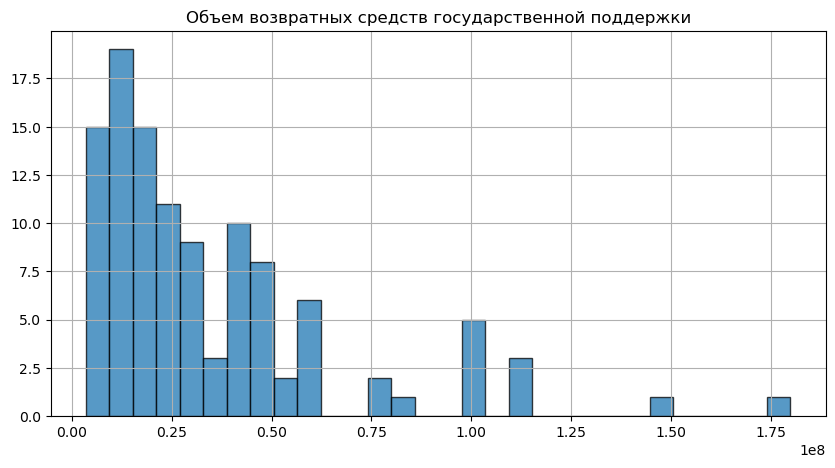

In [84]:
# Построим гистограмму для столбца refundable_support.
data.query('refundable_support > 0')['refundable_support'].hist(bins = 30, figsize = (10,5), ec = 'black',
                                alpha = 0.75, grid = True).set(
     title = 'Объем возвратных средств государственной поддержки');

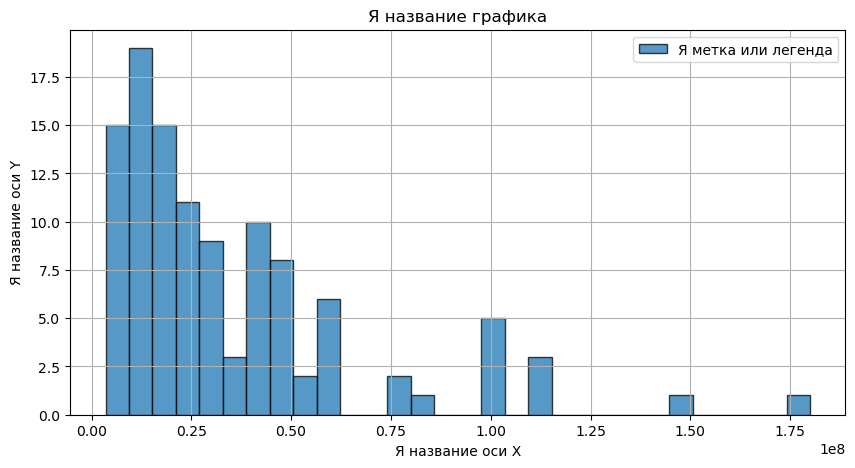

In [85]:
# Комментарий ревьюера 2
import matplotlib.pyplot as plt
data.query('refundable_support > 0')['refundable_support'].hist(bins = 30, figsize = (10,5), ec = 'black',
                                alpha = 0.75, grid = True)
plt.title('Я название графика')
plt.xlabel('Я название оси Х')
plt.ylabel('Я название оси Y')
plt.legend(['Я метка или легенда'])
plt.show()

Разброс цифр очень большой от 3.5 млн. рублей до 180 млн. рублей. Но понять, есть ли выбросы вряд ли возможно. Каждый фильм индивидуален - возможны индивидуальные договорные обязательства.

In [86]:
# Посмотрим на строки с минимальным и максимальным значениями.
display(data[data['refundable_support'] == 3500000])
display(data[data['refundable_support'] == 180000000])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
2982,Сдается дом со всеми неудобствами,111008016,2016-04-27 12:00:00+00:00,Художественный,"ФГУП ""Киноконцерн ""Мосфильм"", ООО ""Киностудия ...",Россия,В.Сторожева,"К.Шахназаров, С.Говорухин",«12+» - для детей старше 12 лет,3500000.0,20000000.0,69428728.0,Фонд кино,5.8,комедия,55800.0


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия, Китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.0,90000000.0,2305074303.0,Фонд кино,5.8,"приключения, фэнтези",333597059.6


Оба фильма снимались с гос. поддержкой. Оба фильма провалились в прокате. Кассовые сборы были меньше бюджета фильма. И если во втором случае они хотя бы покрыли возвратную часть денег из гос.поддержки, то в первом нет. 

In [87]:
# Считаем количество уникальных значений в столбце nonrefundable_support.
len(data['nonrefundable_support'].unique())

76

In [88]:
# Посмотрим сколько всего строк в столбце, где значение не 0.
data[data['nonrefundable_support'] != 0]['nonrefundable_support'].count() 

323

In [89]:
# Посмотрим сколько всего строк в столбце, где значение  0.
data[data['nonrefundable_support'] == 0]['nonrefundable_support'].count() 

9

Тут ситуация немного лучше, на  те же 332 пропуска нули всего в 9 строках.

In [90]:
# Изучим сами занчения и количество повторов.
data['nonrefundable_support'].value_counts().head(33)

25000000.0     53
30000000.0     48
35000000.0     29
40000000.0     26
20000000.0     19
60000000.0     15
50000000.0     11
28000000.0     10
0.0             9
100000000.0     7
15000000.0      5
75000000.0      5
34000000.0      4
200000000.0     4
10000000.0      4
400000000.0     3
5000000.0       3
27000000.0      3
6000000.0       3
250000000.0     3
26000000.0      3
37000000.0      2
150000000.0     2
300000000.0     2
26500000.0      2
24450000.0      2
70000000.0      2
90000000.0      2
24000000.0      2
130000000.0     2
120000000.0     2
45000000.0      2
133000000.0     1
Name: nonrefundable_support, dtype: int64

В 31 случае значения так или иначе повторяются.

In [91]:
data['nonrefundable_support'].value_counts().tail(44)

45000000.0     2
133000000.0    1
50000866.0     1
30123915.0     1
28500000.0     1
140000000.0    1
41500000.0     1
55000000.0     1
64000000.0     1
11520000.0     1
260000000.0    1
138969465.0    1
80000000.0     1
85000000.0     1
190000000.0    1
31000000.0     1
225000000.0    1
8000000.0      1
175000000.0    1
20145285.0     1
25345000.0     1
24986000.0     1
107847945.0    1
46502299.0     1
23000000.0     1
56579055.0     1
25500000.0     1
27510000.0     1
24500000.0     1
97000000.0     1
27500000.0     1
26950000.0     1
110000000.0    1
59000000.0     1
25900000.0     1
392104482.0    1
25200000.0     1
22904000.0     1
29000000.0     1
51000000.0     1
4700000.0      1
5300000.0      1
21700000.0     1
3000000.0      1
Name: nonrefundable_support, dtype: int64

Cнова вижу "кривые" цифры. Но "поближе" на них смотреть уже не буду судя по опыту прошлого столбца:)

In [92]:
# Найдем минимальное значение в столбце.
data[data['nonrefundable_support'] > 0]['nonrefundable_support'].min()

3000000.0

In [93]:
# Найдем максимальное значение в столбце.
data['nonrefundable_support'].max()

400000000.0

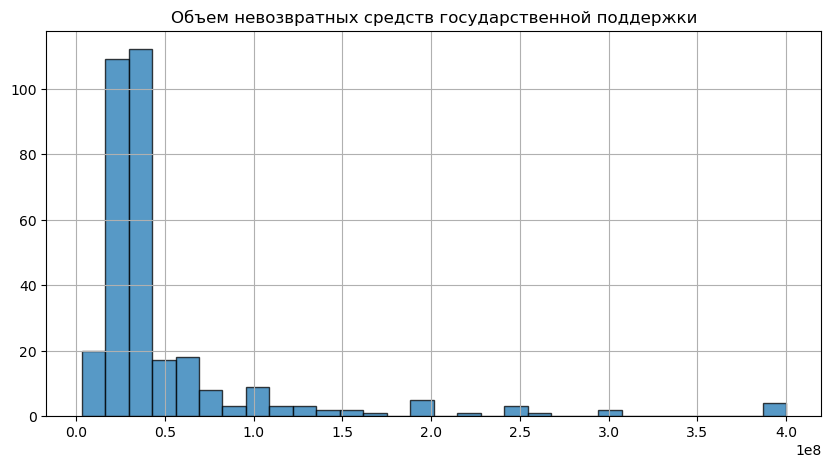

In [94]:
# Построим гистограмму по столбцу nonrefundable_support.
data.query('nonrefundable_support > 0')['nonrefundable_support'].hist(bins = 30, figsize = (10,5), ec = 'black', 
                                                                      alpha = 0.75, grid = True).set(
    title = 'Объем невозвратных средств государственной поддержки');

Разброс цифр также как и в предыдущем столбце очень большой  от 3 млн. рублей до 400 млн. рублей.

In [95]:
# Посмотрим на строки с минимальным и максимальным значениями.
display(data[data['nonrefundable_support'] == 3000000])
display(data[data['nonrefundable_support'] == 400000000])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
7180,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00+00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.0,3000000.0,33000000.0,Министерство культуры,8.0,семейный,NaN


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,590192191.0,Фонд кино,7.5,"спорт, драма",2779686144.0
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история, биография, драма",717703185.5
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика, боевик",NaN


Из интересного: информации о том, вышел ли фильм с минимальным значением невозвратных средств в кинопрокат в кинотеатры нет, возратных средств не имеет. Фильмов с максимальным значением - три. Из них первые два вышли в кинопрокат, первый собрал отличную кассу, больше бюджета, при этом возвратных средств нет. Второй собрал кассу меньше бюджета, но достаточную для возврата средств государству. А вот по третьему тоже непонятно, был ли он в прокате, стоит пропуск в этой ячейке. Очевидно, что наличие данных в столбце box_office будут не во всех ячейках совпадать с наличием данных в столбцах, касаемых гос.поддержки.

In [96]:
# Считаем количество уникальных значений в стобце budget.
len(data['budget'].unique())

291

В этом столбце явно будет немного повторяющихся значений.

In [97]:
# В скольких строках значение не 0?
data[data['budget'] != 0]['budget'].count() 

315

In [98]:
# В скольких строках значение 0?
data[data['budget'] == 0]['budget'].count() 

17

В сумме получаем 332 строки с данными, в остальных пропуски.

In [99]:
data['budget'].value_counts().head(17)

0.0            17
38000000.0      6
50000000.0      4
80000000.0      4
37142857.0      3
38500000.0      3
40000000.0      3
54687500.0      2
120000000.0     2
54000000.0      2
150000000.0     2
60000000.0      2
39000000.0      2
42000000.0      2
300000000.0     2
37878787.0      2
250000000.0     1
Name: budget, dtype: int64

Как и ожидалось, видим, что основная масса значений - это единичные случаи.

In [100]:
# Найдем минимальное значение в столбце.
data[data['budget'] > 0]['budget'].min()

14462464.0

In [101]:
# Найдем максимальное значение в столбце.
data['budget'].max()

2305074303.0

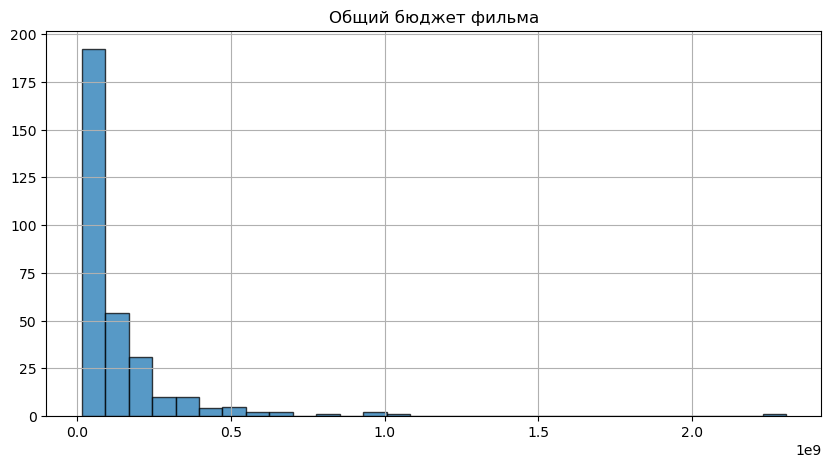

In [102]:
# Построим гистограмму по столбцу budget.
data.query('budget > 0')['budget'].hist(bins = 30, figsize = (10,5), ec = 'black', alpha = 0.75, grid = True).set(
    title = 'Общий бюджет фильма');

Разброс значений, как  и в предыдущих столбцах огромный, от 14.5 млн. рублей до 2.3 млр. рублей.

In [103]:
# Посмотрим на строки с минимальным и максимальным значениями.
display(data[data['budget'] == 14462464])
display(data[data['budget'] == 2305074303])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
3139,Я умею вязать,111019615,2015-11-27 12:00:00+00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.0,4700000.0,14462464.0,Министерство культуры,9.0,драма,801370.0


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия, Китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.0,90000000.0,2305074303.0,Фонд кино,5.8,"приключения, фэнтези",333597059.6


И снова видим примерно ту же картину, что и в предыдущих столбцах. В прокате фильмы не  добрали до потраченного бюджета. В первом случае возврата нет совсем, а вот второй фильм у нас совпал по максимальному значению с фильмом с таким же условием для столбца refundable_support. 

На примерах рассмотренных строк видно, что ячейки с заполненными данными (даже если это нули) совпадают во всех трех столбцах, но так ли это? Проверим.

In [104]:
# Делаем срез по этим трем столбцам с условием, что в них во всех одновременно есть данные больше или равно нулю.
data_support_budget = data[(data['refundable_support'] >= 0) & (
    data['nonrefundable_support'] >= 0) & (data['budget'] >= 0 )]
data_support_budget_columns = data_support_budget[['refundable_support', 'nonrefundable_support', 'budget']]
data_support_budget_columns.sort_values(by = 'budget', ascending = False)

,refundable_support,nonrefundable_support,budget
index,,,
7114,180000000.0,90000000.0,2305074303.0
5437,110000000.0,190000000.0,1032905957.0
7464,100000000.0,400000000.0,980000000.0
7474,100000000.0,400000000.0,944000000.0
7171,0.0,60000000.0,779941965.0
...,...,...,...
5806,10000000.0,60000000.0,0.0
3739,25000000.0,20000000.0,0.0
6323,0.0,138969465.0,0.0


In [105]:
data_support_budget_columns.describe()

,refundable_support,nonrefundable_support,budget
count,332.0,332.0,332.0
mean,11864457.8,48980988.9,127229716.7
std,24916555.3,59980117.9,188588333.1
min,0.0,0.0,0.0
25%,0.0,25000000.0,42000000.0
50%,0.0,30000000.0,68649916.0
75%,15000000.0,40375000.0,141985319.5
max,180000000.0,400000000.0,2305074303.0


Действительно, заполненные ячейки совпадают по этим трем столбцам.

In [106]:
# Считаем количество уникальных значений в стобце box_office.
len(data['box_office'].unique())

2939

In [107]:
# В скольких строках значение не 0?
data[data['box_office'] != 0]['box_office'].count() 

3134

In [108]:
# В скольких строках значение  0?
data[data['box_office'] == 0]['box_office'].count() 

24

В столбце box_office почти в три раза больше заполненных ячеек, чем в столбцах, связанных с гос.поддержкой. 

In [109]:
# Найдем минимальное значение в столбце.
data[data['box_office'] > 0]['box_office'].min()

40.0

In [110]:
# Найдем максимальное значение в столбце.
data['box_office'].max()

3073568690.79

In [111]:
# Посмотрим на строки с минимальным и максимальным значениями.
display(data[data['box_office'] == 40])
display(data[data['box_office'] == 3073568690.79])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
151,Жестокий романс,111006013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Рязанов,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,8.1,"драма, мелодрама, история",40.0


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
index,,,,,,,,,,,,,,,,
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3073568690.8


Сборы в 2013 году 40 рублей пусть даже за старый советский фильм? Плюс никаких данных по гос.поддержке, хотя она очевидно были и скорее всего 100% в СССР. Посмотрю, есть ли другие похожие строки со сборами, например, до 200 рублей.

In [112]:
len(data[(data['box_office'] >= 40) & (data['box_office'] <= 200)])

47

Таких строк не мало - 47. Даже если посмотреть кассу до 10 000 рублей, будет 515 фильмов. До 100 000 рублей - 782. Эти цифры странные,  в моем представлении кассовые сборы просто не могут быть такими маленькими. Если только фильм вышел в прокат, а билеты стоят копейки, или речь идет о другой валюте (какой, не знаю), или это ошибка в данных (случайная или нет). Например, в шапке таблицы априори было заложено значение тысячи, и человек, который заполнял таблицу, написал цифру 40, предполагая, что и так все понятно. А через какое-то время шапку таблицы переделали, пометку тыс. убрали, и стали заполнять с нулями, а старые значения так остались как есть. Изменить что-то в этих данных я не могу, ни удалить, ни заменить значение, хотя в большинстве из них в столбцах про гос.поддержку пусто, значения из других столбцов нам пригодятся. 

In [113]:
a, b = len(temp), len(data)
print(len(temp), len(data), round((a-b)/a*100, 2))

7485 7484 0.01


#### Шаг 2.6. Добавим новые столбцы

In [114]:
# Создадим новый столбец  realise_year с годом проката фильма.
data['realise_year'] = data['show_start_date'].dt.year

In [115]:
# Проверим содержимое столбца.
data['realise_year'].unique()

array([2015, 2016, 2013, 2014, 2012, 2017, 2010, 2011, 2018, 2019])

In [116]:
# Напишем функцию, которая будет в каждой строке столбца брать первое значение до запятой и сохранять его в новых столбцах с 
# названием main_(название столбца).
def main_value (data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(', ')[0])
    return data

In [117]:
# Укажем столбцы для работы функции.
data = main_value(data, ['director', 'genres'])

In [118]:
# Проверим, что в столбцах.
data['main_director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [119]:
data['main_genres'].unique()

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', 'unknown', 'военный',
       'документальный', 'фэнтези', 'криминал', 'приключения', 'аниме',
       'детектив', 'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное ТВ'], dtype=object)

In [120]:
# Создадим новый стобцец part_of_support, в котором суммируем значения из столбцов refundable_support и nonrefundable_support
# и посчитаем долю гос. поддержки в общем бюджете в процентах.
data['part_of_support'] = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']) * 100 

**Вывод:**
На данном этапе мы:
- переименовали столбец puNumber, приведя его к единой стилистике, изменили тип данных на int64;
- преобразовали дату в стобце show_start_date в формат datetime64;
- проверили данные на пропуски, проанализировали их и заменили пропуски в стобцах production_country, director, producer, film_studio, financing_source, genres на unknown. 
- изменили тип данных в столбце ratings на float64;
- изменили в стоблце ratings процентную запись на бальную;
- проверили данные на явные дубликаты, они не найдены;
- изучили категориальные значения в столбцах:
  - в столбце title нашли неявные дубликаты, появление которых связано с разными номерами прокатных удостоверений для одного и того же фильма;
  - в столбце type нашли неявные дубликаты, появление которых связано с лишним пробелом перед значением;
  - в столбцах film_studio, production_country, director, producer найдены и удалены лишние пробелы строки. В production_country также изменили символ "-" на ",", тем самым также убрали лишние пробелы или их отсутствие между перечислением стран;
  - в столбце genres, наоборот, добавили пробелы после запятых при перечислении жанров.
  
В целом, лишние пробелы или их отсутствие, а также знаки препинания - общая проблема для стобцов с категориальными значениями.
- изучили количественные значения в столбцах refundable_support, nonrefindable_support и budget:
  - выяснили, что каждый из них заполнен в 332 строках, некоторые ячейки заполнены нулями в разных комбинациях, остальное пропуски;
  - также выяснили, что разброс значений в этих столбцах очень большой, но определить, выбросы ли это не представляется возможным, это, по-хорошему, надо смотреть проектную документацию по каждому фильму и искать ошибки.
- изучили значения в столбце box_office:
  - выяснили, что в нем заполненных ячеек почти в три раза больше, чем предыдущих;
  - увидели  в данных что-то похожее на выбросы, но ничего сделать с этим нельзя.
- добавили новые столбцы:
  - realise_year c годом премьеры фильма;
  - main_director и main_genre - выделили из списка первое имя и название жанра в столбце;
  - part_of_support - посчитали долю государственной поддержки в общем бюджете.

### Шаг 3. Проведем исследовательский анализ данных

In [121]:
# Посчитаем, сколько фильмов выходило каждый год, сколько из них вышло в прокат в рамках года, и сохраним данные в сводной таблице 
# data_count_of_films.
data_count_of_films = data.pivot_table(
    index = ['realise_year'], values = ['title', 'box_office'], aggfunc = 'count').reset_index()
data_count_of_films

,realise_year,box_office,title
0,2010,105,984
1,2011,109,622
2,2012,128,593
3,2013,184,630
4,2014,279,806
5,2015,465,705
6,2016,526,818
7,2017,357,505
8,2018,475,891
9,2019,530,930


In [122]:
# Добавим  в таблицу data_count_of_films столбец part_of_box, в котором будет доля фильмов вышедших в кинопрокат от 
# общего количества в год.
data_count_of_films['part_of_box'] = ((data_count_of_films['box_office']
                                      / data_count_of_films['title']) * 100)
data_count_of_films

,realise_year,box_office,title,part_of_box
0,2010,105,984,10.7
1,2011,109,622,17.5
2,2012,128,593,21.6
3,2013,184,630,29.2
4,2014,279,806,34.6
5,2015,465,705,66.0
6,2016,526,818,64.3
7,2017,357,505,70.7
8,2018,475,891,53.3
9,2019,530,930,57.0


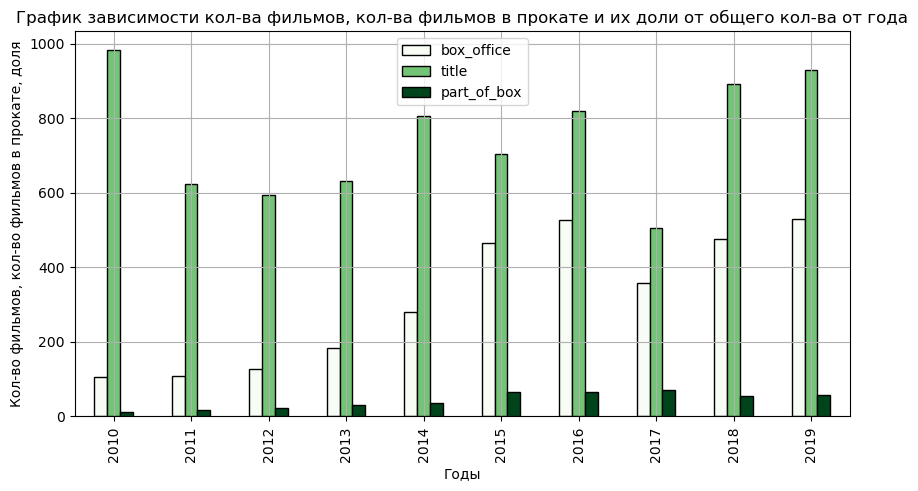

In [123]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости количества фильмов, фильмов вышедших в прокат и доли этих фильмов от общего 
## количества в год.
data_count_of_films.plot(kind = 'bar', x = 'realise_year', ec = 'black', cmap = 'Greens').set(
    title = 'График зависимости кол-ва фильмов, кол-ва фильмов в прокате и их доли от общего кол-ва от года')
plt.ylabel('Кол-во фильмов, кол-во фильмов в прокате, доля')
plt.xlabel('Годы')
plt.grid();

По количеству выпущенных фильмов в год мы видим, что явной зависимости количества фильмов от года нет. В 2010 году  было выпущено больше всего фильмов, затем в 2011 наступило резкое падение на треть, которое сохранялось до 2014, в 2014 начался небольшой рост, в 2017 снова падение на треть, и затем рост в 2018-2019 примерно на 50%. Вероятнее всего, такие скачки связаны с состоянием экономики и влиянием ее на киноиндустрию, на финансирование новых фильмов.

В 2010 году в прокат вышло минимальное количество фильмов. Далее начинается небольшой подьем, переходящий в скачок роста к 2015-2016 годам с небольшим понижением в 2017 и снова рост. Опропределенно виден  рост количества вышедщих в прокат фильмов, начиная с 2010 года.

Это подтверждает и третий параметр - доля фильмов, вышедших в прокат от общего количества фильмов в год.

In [124]:
# Посчитаем общую сумму сборов, полученную от проката фильмов каждый год.
data_dynamics_by_year = data.pivot_table(
    index = ['realise_year'], values = ['box_office'], aggfunc = 'sum').sort_values(
    by = 'realise_year').reset_index()
data_dynamics_by_year

,realise_year,box_office
0,2010,2428654.0
1,2011,14102765.0
2,2012,6955423.0
3,2013,29799706.2
4,2014,7444951859.2
5,2015,39497365196.4
6,2016,47866299741.9
7,2017,48563707217.5
8,2018,49668403134.3
9,2019,48425708779.6


In [125]:
# Найдем минимальные и максимальные значения в столбце box_office.
box_min = data_dynamics_by_year['box_office'].min()
box_max = data_dynamics_by_year['box_office'].max()

In [126]:
# Посмотрим, в каких годах они были.
display(data_dynamics_by_year.loc[data_dynamics_by_year.box_office == box_min, ['realise_year']])
display(data_dynamics_by_year.loc[data_dynamics_by_year.box_office == box_max, ['realise_year']])


,realise_year
0,2010


,realise_year
8,2018


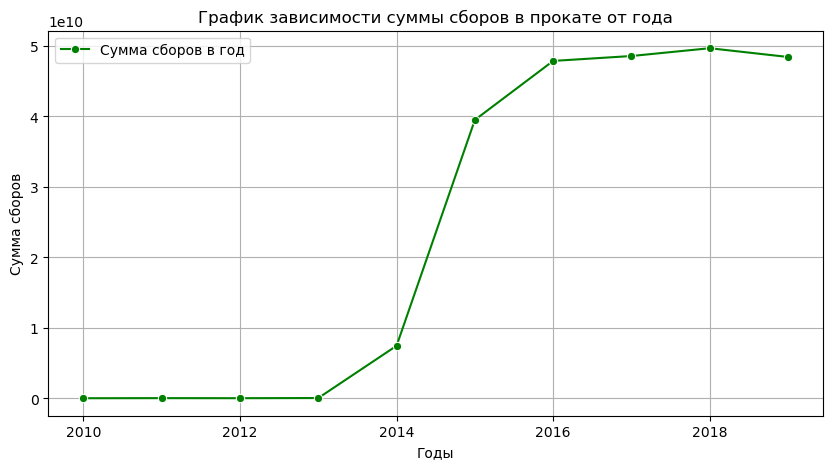

In [127]:
# Задаем размер графика
plt.rcParams['figure.figsize'] = [10,5] 
## Построим линейную диаграмму зависимости суммы сборов в прокате от года, когда фильм вышел в прокат.
sns.lineplot(data = data_dynamics_by_year, y = 'box_office', x = 'realise_year', color = 'green', marker = 'o').set(
    title = 'График зависимости суммы сборов в прокате от года')
plt.legend(labels = ['Сумма сборов в год'])
plt.ylabel('Сумма сборов')
plt.xlabel('Годы')
plt.grid();

Минимальную общую сумму в прокате фильмы набрали за 2010 год, макисимальную за 2018. В 2010 году это можно объяснить количеством фильмов, вышедших в прокат, оно было минимально - всего 105. В 2018 - 475 фильмов вышло в прокат, это не максимальное значение, но оно входит в топ 3. Я вижу определенную связь между количеством фильмов, вышедших в прокат и кассовыми сборами.

In [128]:
# Считаем среднее значение и медиану по сумме сборов каждый год.
data_mean_median_by_year = data.pivot_table(
    index = ['realise_year'], values = 'box_office', aggfunc = {'mean', 'median'}).reset_index()
data_mean_median_by_year

,realise_year,mean,median
0,2010,23130.0,1700.0
1,2011,129383.2,3000.0
2,2012,54339.2,5660.0
3,2013,161954.9,3522.5
4,2014,26684415.3,18160.0
5,2015,84940570.3,4920933.0
6,2016,91000569.9,3846679.4
7,2017,136032793.3,9968340.0
8,2018,104565059.2,8891102.2
9,2019,91369261.8,4627798.3


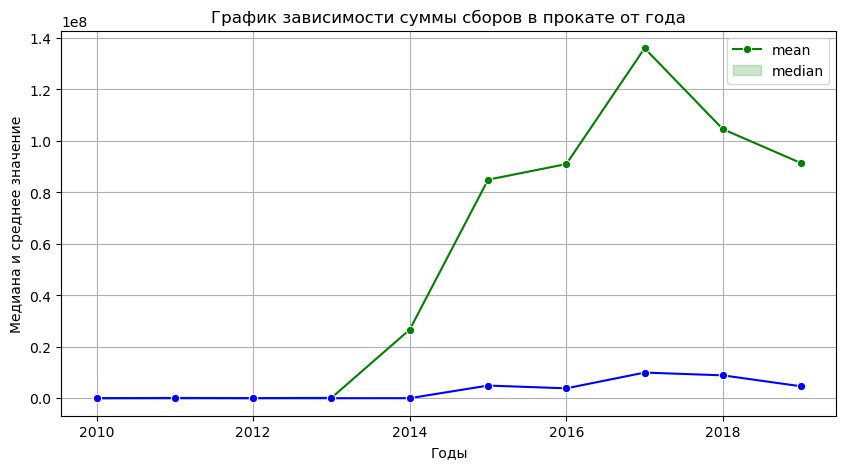

In [129]:
# Задаем размер графика
plt.rcParams['figure.figsize'] = [10,5] 
## Построим линейную диаграмму зависимости медианы и среднего значения по сумме сборов от года.
sns.lineplot(data = data_mean_median_by_year, y = 'mean', x = 'realise_year', color = 'green', marker = 'o');
sns.lineplot(data = data_mean_median_by_year, y = 'median',  x = 'realise_year', color = 'blue', marker = 'o').set(
title = 'График зависимости суммы сборов в прокате от года')
plt.legend(labels = ['mean','median'])
plt.ylabel('Медиана и среднее значение')
plt.xlabel('Годы')
plt.grid();

До 2013 года медиана и среднее значение совпадают. Далее среднее значение уходит резко вверх. Такой график по среднему значению мы получили, вероятно, из-за аномально маленьких значений в выборке, которые мы не стали удать. Получается, что до 2013 года таких разбросов в данных не было. График по медиане более информативен и, в принципе, повторяет выводы выше.

In [130]:
# Сформируем сводную таблицу по столбцам age_restriction и realise_year, суммируем сумму сборов за год по каждой возрастной 
# категории, сделаем срез на период с 2015 по 2019 годы, также посчитаем средние и медианные значения сборов  по возрасту.  
data_age_limit = data.pivot_table(
    index = ['age_restriction', 'realise_year'], values = 'box_office', aggfunc = {'sum', 'mean', 'median'}).query(
    '2015 <= realise_year <= 2019').reset_index()
pd.pivot_table(data_age_limit, index = ['realise_year', 'age_restriction'])

mean     median  \
realise_year age_restriction                                                 
2015         «0+» - для любой зрительской аудитории   9719348.2  2943318.7   
             «12+» - для детей старше 12 лет        186521671.4 15351562.5   
             «16+» - для детей старше 16 лет         67667386.1  4676819.4   
             «18+» - запрещено для детей             41153851.3  4616614.7   
             «6+» - для детей старше 6 лет          164184893.8 20380982.2   
2016         «0+» - для любой зрительской аудитории   3664118.3  2571294.1   
             «12+» - для детей старше 12 лет        148834713.7  4690635.2   
             «16+» - для детей старше 16 лет         91563453.5  5133021.7   
             «18+» - запрещено для детей             44992912.7  6107001.7   
             «6+» - для детей старше 6 лет          172187800.1  3026256.1   
2017         «0+» - для любой зрительской аудитории  76532976.7 22178956.0   
             «12+» - для детей старше 12 лет        191498235.6  9010548.0   
             «16+» - для детей старше 16 лет        154917709.9  9702077.0   
             «18+» - запрещено для детей             65656432.5  8212677.0   
             «6+» - для детей старше 6 лет          268580936.6 51992103.0   
2018         «0+» - для любой зрительской аудитории   6489800.4  3616937.3   
             «12+» - для детей старше 12 лет        212944651.7  8931965.7   
             «16+» - для детей старше 16 лет        105792322.7  9010638.6   
             «18+» - запрещено для детей             48939025.1  7179466.0   
             «6+» - для детей старше 6 лет          148602568.0 14688850.3   
2019         «0+» - для любой зрительской аудитории   5915355.6  3885434.5   
             «12+» - для детей старше 12 лет        149178809.1  3405545.8   
             «16+» - для детей старше 16 лет         71648421.3  3210717.8   
             «18+» - запрещено для детей             55310362.3  5603216.5   
             «6+» - для детей старше 6 лет          158673440.1 12875350.3   

                                                              sum  
realise_year age_restriction                                       
2015         «0+» - для любой зрительской аудитории   379054578.4  
             «12+» - для детей старше 12 лет        13616082008.9  
             «16+» - для детей старше 16 лет        11368120870.3  
             «18+» - запрещено для детей             5432308367.4  
             «6+» - для детей старше 6 лет           8701799371.4  
2016         «0+» - для любой зрительской аудитории   150228848.7  
             «12+» - для детей старше 12 лет        12204446524.4  
             «16+» - для детей старше 16 лет        16664548541.7  
             «18+» - запрещено для детей             6793929818.9  
             «6+» - для детей старше 6 лет          12053146008.2  
2017         «0+» - для любой зрительской аудитории   229598930.0  
             «12+» - для детей старше 12 лет         7851427660.7  
             «16+» - для детей старше 16 лет        18745042900.1  
             «18+» - запрещено для детей             9651495581.0  
             «6+» - для детей старше 6 лет          12086142145.8  
2018         «0+» - для любой зрительской аудитории    32449002.1  
             «12+» - для детей старше 12 лет        14267291660.7  
             «16+» - для детей старше 16 лет        16503602347.0  
             «18+» - запрещено для детей             8760085501.1  
             «6+» - для детей старше 6 лет          10104974623.4  
2019         «0+» - для любой зрительской аудитории    17746066.8  
             «12+» - для детей старше 12 лет        12680198773.7  
             «16+» - для детей старше 16 лет        12753418984.6  
             «18+» - запрещено для детей            10121796303.6  
             «6+» - для детей старше 6 лет          12852548650.9

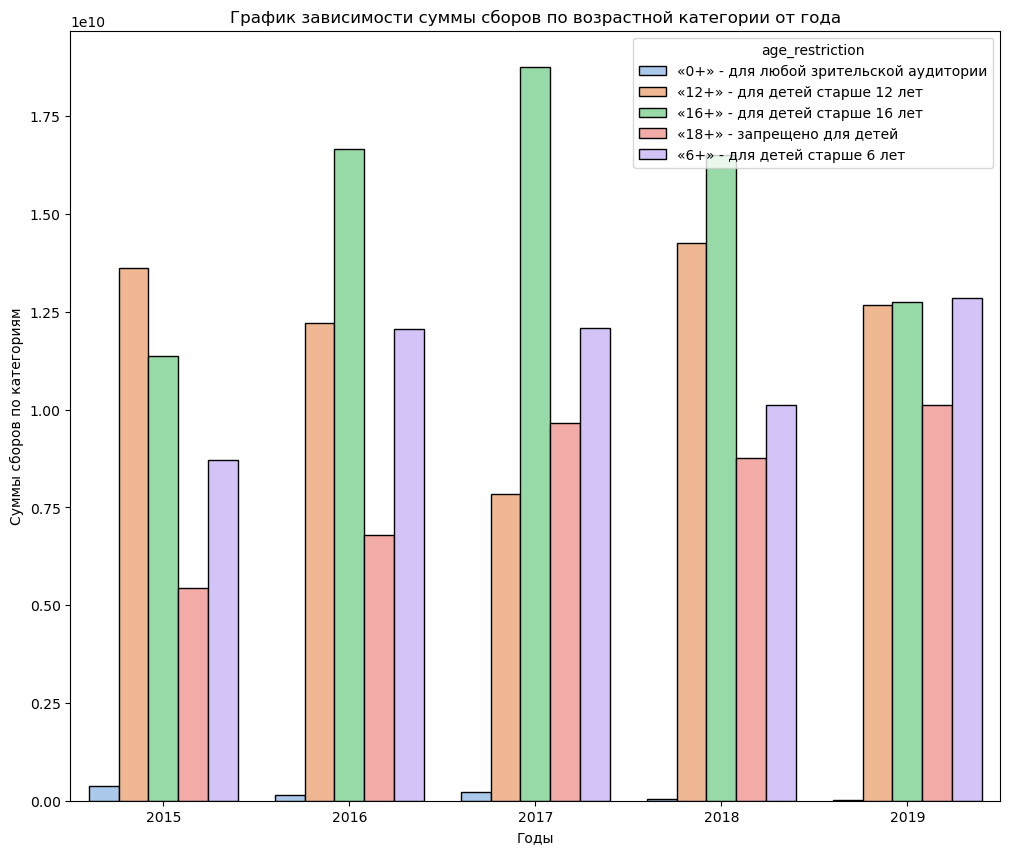

In [131]:
#Задаем размер графика.
plt.rcParams['figure.figsize'] = [12,10] 
## Построим столбчатую диаграмму зависимости суммы сборов по каждой возрастной категории по годам.
sns.barplot(data = data_age_limit, x = 'realise_year', y = 'sum', hue = 'age_restriction', palette = 'pastel', 
            ec = 'black').set(title = 'График зависимости суммы сборов по возрастной категории от года')
plt.ylabel('Суммы сборов по категориям')
plt.xlabel('Годы');

На графике видно, что фильмы для категории 0+ из года в года собирали наименьшую кассу, с 2015 по 2019 мы даже видим падение сборов. Вероятно это связано с возрастом зрителей, совсем маленькие дети не могут долго сидеть на одном месте, чтобы выдержать целый киносеанс, и эта категория фильмов наименее востребована в кинопрокате.

Фильмы для категории 6+ с 2015 стабильно собирают хорошую кассу и сборы растут, с небольшим падением в 2017. Могу предположить, что  в эти годы количество анимационных мультфильмов и фильмов для детей выросло. Для этой возрастной категории походы по выходным в кино с родителями очень востребованы, так же можно совместить их с  празднованием дней рождений, это могут быть  групповые походы в детском саду и в начальных классах школы.

Категория 12+ достаточно стабильна и собирает хорошие сборы, не считая провала в 2017м году. Может быть просто не было ничего интересного в кинопрокате в этом году?

Далее самая распространенная категория 16+. Ею маркируют большинство фильмов, не только для детей, но и для взрослых. Показывает стабильный рост до 2017 года, с 2016 по 2018 опережает остальные категории по сборам. С 2018 по 2019 идет снижение кассовых сборов.

В 2019 году вообще предыдущие три категории сравнялись практически по сборам. Даже интересно стало посмотреть, что там шло в кинотеатрах в этом году...

Наконец, последняя категория 18+, которая показывает стабильный рост практически все время с 2015 года. Согласно поиску в интернете, дети любого возраста, даже в сопровождении взрослых не допускаются на такие фильмы, т.к. они могут содержать, ну скажем то, что для детской психики нежелательно...сцены жестокости, насилия, нецензурных выражений и т.д., то есть это взрослый сегмент, и значит взрослые люди стали чаще ходить в кино в эти годы. Возможно рост в этой категории "оттянул" на себя часть зрителей из категории 16+, отсюда и небольшое падение в ней  за последние два года.

In [132]:
# Посмотрим, какая возрастная категория собрала больше всего денег за этот период.
data_age_limit_money = data_age_limit.pivot_table(
    index = ['age_restriction'], values = 'sum', aggfunc = {'sum'}).reset_index()
data_age_limit_money.sort_values(by = 'sum', ascending = False)

,age_restriction,sum
2,«16+» - для детей старше 16 лет,76034733643.6
1,«12+» - для детей старше 12 лет,60619446628.3
4,«6+» - для детей старше 6 лет,55798610799.7
3,«18+» - запрещено для детей,40759615572.1
0,«0+» - для любой зрительской аудитории,809077426.0


Как я и писала выше, 16+ самая популярная категория, сборы в ней самые большие, 0+ - самая непопулярная.

In [133]:
# Посмотрим  на сумму средних значений по сборам в каждой категории за выбранный период.
data_age_mean = data_age_limit.pivot_table(
    index = ['age_restriction'], values = 'mean', aggfunc = {'sum'}).reset_index()
data_age_mean.sort_values(by = 'sum', ascending = False)

,age_restriction,sum
4,«6+» - для детей старше 6 лет,912229638.6
1,«12+» - для детей старше 12 лет,888978081.4
2,«16+» - для детей старше 16 лет,491589293.6
3,«18+» - запрещено для детей,256052584.0
0,«0+» - для любой зрительской аудитории,102321599.1


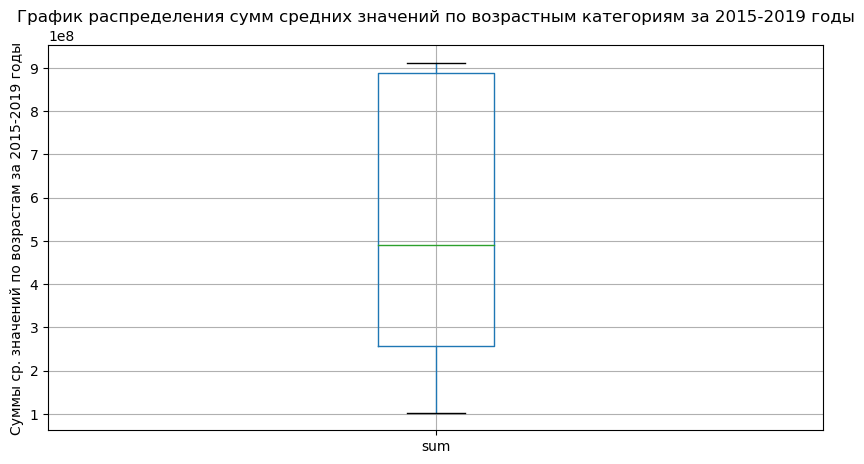

In [134]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для стобца sum.
data_age_mean.boxplot('sum')
plt.title('График распределения сумм средних значений по возрастным категориям за 2015-2019 годы')
plt.ylabel('Суммы ср. значений по возрастам за 2015-2019 годы');

Диаграмма показывает, что в размах "усов" попадают суммы примерно от 100 млн. рублей до 900 млн. рублей, с межквартильным размахом от 260 до 890 млн. рублей, с медианой на 490 млн. рублей.

In [135]:
# Посмотрим  на сумму медианных значений по сборам в каждой категории за выбранный период.
data_age_median = data_age_limit.pivot_table(
    index = ['age_restriction'], values = 'median', aggfunc = {'sum'}).reset_index()
data_age_median.sort_values(by = 'sum', ascending = False)

,age_restriction,sum
4,«6+» - для детей старше 6 лет,102963542.0
1,«12+» - для детей старше 12 лет,41390257.2
0,«0+» - для любой зрительской аудитории,35195940.6
2,«16+» - для детей старше 16 лет,31733274.6
3,«18+» - запрещено для детей,31718976.0


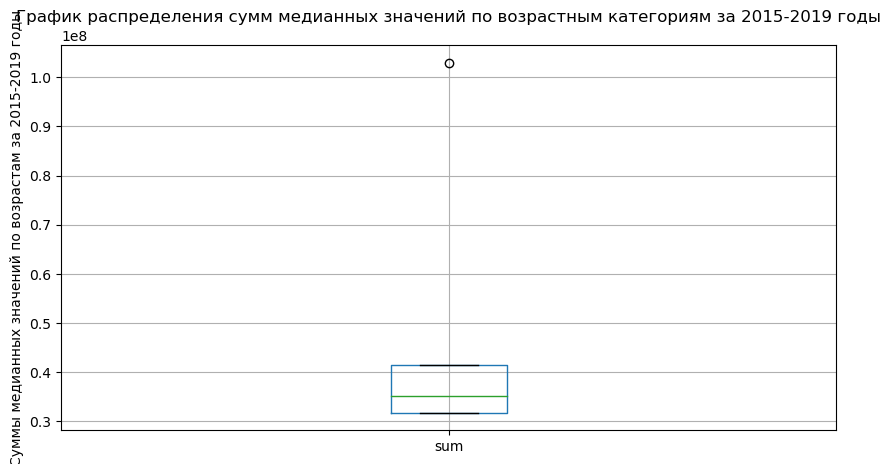

In [136]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для стобца sum.
data_age_median.boxplot('sum')
plt.title('График распределения сумм медианных значений по возрастным категориям за 2015-2019 годы')
plt.ylabel('Суммы медианных значений по возрастам за 2015-2019 годы');

Диаграмма показывает, что в размах "усов" попадают суммы примерно от 32 млн. рублей до 41 млн. рублей, с таким же межквартильным размахом, с медианой на 35 млн. рублей. Сумму в 102 млн. рублей, собранную в категории 6+ диаграмма считает выбросом.

В нашем исследовании вероятнее правильнее использовать среднее значение, а не медиану, потому что мы все-таки смотрим общий рейтинг с общими суммами сборов (большими и маленькими). По медианному значению у нас категория 0+ выходит на третье место, а 16+ на предпоследнем, это некорректно.

Сделаем срез данных по 2019 году и возрастным категориям, интересно посмотреть, какие жанры лидировали.

In [137]:
# Делаем срез по этим трем столбцам с условием, что в них во всех одновременно есть данные больше или равно нулю.
data_genres = data[(data['box_office'] > 0) & (
    data['realise_year'] == 2019) & (data['main_genres'] != 'unknown')]
data_genres_columns = data_genres[['age_restriction', 'realise_year', 'main_genres']]
data_genres_columns[['main_genres', 'age_restriction']].value_counts().head(20)

main_genres     age_restriction                
драма           «18+» - запрещено для детей        57
                «16+» - для детей старше 16 лет    43
ужасы           «18+» - запрещено для детей        38
мультфильм      «6+» - для детей старше 6 лет      36
комедия         «16+» - для детей старше 16 лет    29
триллер         «18+» - запрещено для детей        21
боевик          «18+» - запрещено для детей        19
драма           «12+» - для детей старше 12 лет    17
документальный  «16+» - для детей старше 16 лет    16
триллер         «16+» - для детей старше 16 лет    15
комедия         «18+» - запрещено для детей        14
                «12+» - для детей старше 12 лет    14
фантастика      «16+» - для детей старше 16 лет    13
ужасы           «16+» - для детей старше 16 лет    12
мелодрама       «16+» - для детей старше 16 лет     8
фэнтези         «16+» - для детей старше 16 лет     7
                «12+» - для детей старше 12 лет     6
мультфильм      «12+» - для детей 

Что ж...в 2019 наибольшей популярностью  пользовались фильмы с жанром драма (100  в сумме для 16+ и 18+), ужасы и триллеры (59 в сумме вместе для 18+), дальше лидируют мультфильмы для детей 6+ (36), комедии для 16+ (29). 

Как мы видим на этой выборке, фильмов 0+ нет вообще (или их меньше 5), очень непопулярная категория, такие фильмы вероятно не окупаются.  Посмотрим, сколько вообще было выпущено в прокат фильмов по возрастным категориям.

In [138]:
data_genres_columns['age_restriction'].value_counts().head(20)

«18+» - запрещено для детей               175
«16+» - для детей старше 16 лет           161
«6+» - для детей старше 6 лет              72
«12+» - для детей старше 12 лет            69
«0+» - для любой зрительской аудитории      1
Name: age_restriction, dtype: int64

Действительно, для 0+ 1 фильм, с большим отрывом лидируют взрослые фильмы для 16+ и 18+ (367). Как известно, спрос рождает предложение, взрослые люди стали чаще ходить в кино. Киноиндустрия сделала ставку именно на эту категорию. 

Но категория 18+, судя по срезам выше, себя не окупает (4ое место по окупаемости, хуже только у малышей).

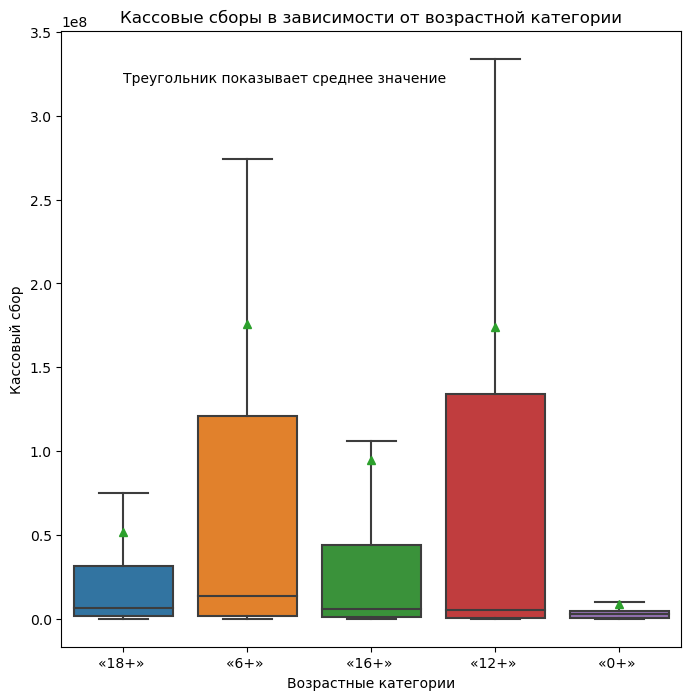

In [139]:
# Построим диаграммы размаха для всех возрастных категорий
temp = data.copy()
# Для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))

# Сделаем срез  по годам
year_query = (temp['realise_year'] >= 2015) & (temp['realise_year'] <= 2019)

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_query], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

**Вывод:**

На этапе исследовательского анализа данных мы проверили следующее:
- посмотрели сколько фильмов выходило в целом в год (премьера) и сколько выходило в прокат. Посчитали долю фильмов, вышедших в прокат от общего количества. Явной зависимости вышедших фильмов от года мы не увидели, были свои взлеты и падения. Выше я предположила, что это связано с финансированием киноиндустрии, которое в свою очередь, естественно, связано с экономической ситуацией;
- выяснили, что в 2010 году сумма сборов в кинотеатрах была минимальной (но и фильмов, вышедших в прокат было мало), в  2018 году - максимальной. В этом случае видна зависимость суммы сборов от количества фильмов, вышедших в прокат;
- посчитали среднюю и медианную сумму сборов для каждого года, медиана, в целом, подтвержает, описанное выше. По среднему значению тоже виднен рост с 2013 года, но тут могут создавать "помехи" необъяснимо маленькие цифры по сборам, которых довольно много;
- выяснили, что возрастное ограничение сильно влияет на суммы сборов в период с 2015 по 2019 годы. Меньше всего сборов получили фильмы с возрастной категорией 0+, больше всего - 16+. По этим категориям ситуация стабильна в этот период. В категории 16+ сборы растут, в 0+ все время низкие. В категории 12+ и 6+ сборы растут с небольшими провалами в 2017 и 2018 году, соответственно. Также сборы растут в категории 18+. По количеству фильмов, вышедших в прокат, можно предположить, что киноиндустрия сделала ставку на категории 16+ и 18+, но, к сожалению, в плане сборов категория 18+ себя не оправдала. Самыми прибыльными категориями оказались 16+, 12+ и 6+. Последние две по количеству фильмов в половину меньше первой, по прибыли заняли второе и третье места в нашем рейтинге.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

In [140]:
# Создадим столбец, где суммируем возвратные и невозвратные средства гос.поддержки.
data['sum_support'] = (data['refundable_support'] + data['nonrefundable_support'])

In [141]:
# Посчитаем среднюю долю гос. поддержки от общего бюдэета.
data['part_of_support'].median()

61.40376284219444

In [142]:
# Выведем  некоторые интересующие нас столцы и сохраним данные в data_support.
data_support = data[['refundable_support', 'nonrefundable_support', 'sum_support','budget','box_office', 
                     'financing_source', 'main_genres', 'main_director','ratings', 'realise_year']].query(
    'sum_support >= 0')
data_support.sort_values(by = 'sum_support', ascending = False)

,refundable_support,nonrefundable_support,sum_support,budget,box_office,financing_source,main_genres,main_director,ratings,realise_year
index,,,,,,,,,,
7474,100000000.0,400000000.0,500000000.0,944000000.0,NaN,Фонд кино,фантастика,Ф.Бондарчук,5.7,2019
7464,100000000.0,400000000.0,500000000.0,980000000.0,717703185.5,Фонд кино,история,А.Кравчук,6.0,2019
3351,150000000.0,300000000.0,450000000.0,684200536.0,364285139.6,Фонд кино,драма,А.Мизгирев,6.6,2016
2920,50000000.0,392104482.0,442104482.0,635283867.0,1402255390.0,Фонд кино,драма,Н.Лебедев,7.6,2016
5653,0.0,400000000.0,400000000.0,590192191.0,2779686144.0,Фонд кино,спорт,А.Мегердичев,7.5,2017
...,...,...,...,...,...,...,...,...,...,...
5600,0.0,6000000.0,6000000.0,136230333.0,126713450.2,Министерство культуры,приключения,А.Богуславский,5.2,2017
3732,0.0,6000000.0,6000000.0,90278063.0,9680744.0,Министерство культуры,фантастика,А.Волгин,4.0,2016
2517,0.0,5000000.0,5000000.0,28115580.0,2323980.0,Министерство культуры,комедия,Е.Константинова (псевдоним Алена Званцева),6.3,2015


Итак, я хотела проверить в этом разделе следующие гипотезы:
- какой источник финансирования превалирует;
- посмотрим сколько средств выделяется на поддержку кино;
- зависит ли финансирование от режиссера, который снимает фильм;
- на какие жанры лучше всего выделяются средства;
- окупаются ли самые хорошо финансируемые фильмы в прокате;
- есть ли взаимосвязь окупаемости и рейтинга на Кинопоиске.

In [143]:
# Посмотрим, какой источник финансирования чаще всего фигурирует в таблице.
data_support['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [144]:
# Посчитаем общие суммы финансирования по источникам.
data_source = data_support.pivot_table(
    index = ['financing_source'], values = 'sum_support', aggfunc = {'sum'}).reset_index()
data_source

,financing_source,sum
0,Министерство культуры,4836661000.0
1,"Министерство культуры, Фонд кино",1185431354.0
2,Фонд кино,14178595958.0


In [145]:
print(data_source.min())
print()
print(data_source.max())

financing_source    Министерство культуры
sum                          1185431354.0
dtype: object

financing_source       Фонд кино
sum                14178595958.0
dtype: object


In [146]:
# Посмотрим, каковы объемы возвратных средств.
data_refund = data_support.pivot_table(
    index = ['financing_source'], values = 'refundable_support', aggfunc = {'sum'}).reset_index()
data_refund

,financing_source,sum
0,Министерство культуры,0.0
1,"Министерство культуры, Фонд кино",325500000.0
2,Фонд кино,3613500000.0


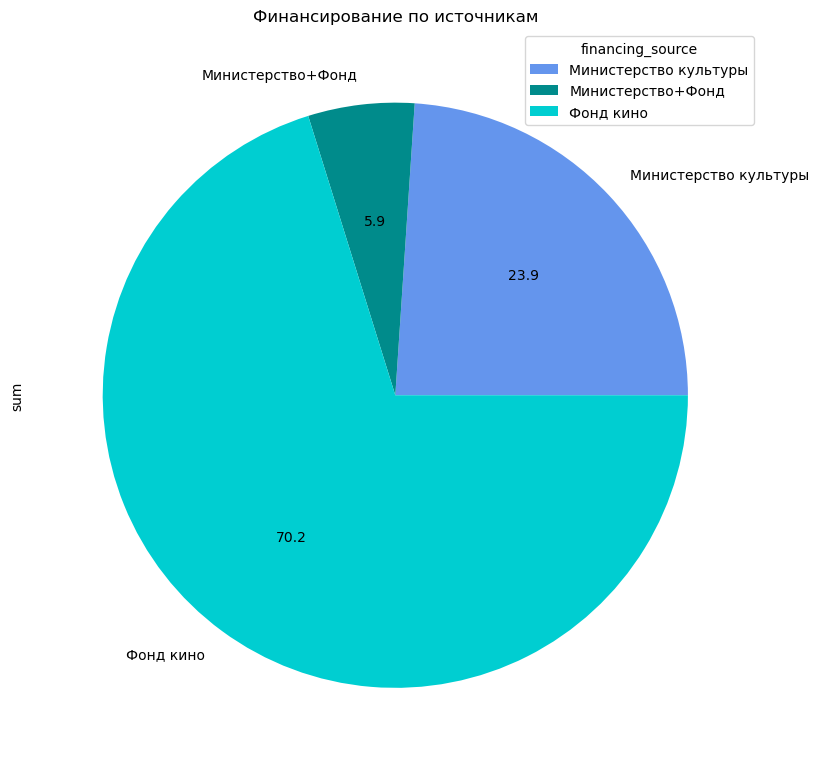

In [147]:
# Построим круговую диаграмму по data_source.
mylabels = ['Министерство культуры','Министерство+Фонд', 'Фонд кино']
data_source.plot(y = 'sum', kind = 'pie', figsize = (9.5,9.5), labels = mylabels, subplots = True, colors = [
    'CornflowerBlue', 'DarkCyan', 'DarkTurquoise'], autopct = '%.1f')
plt.legend(title = 'financing_source')
plt.title('Финансирование по источникам');

Итак, по количеству профинансированных фильмов лидирует Министерство культуры, на втором месте Фонд кино. А вот по сумме вложений наоборот. Их совместные проекты находятся на последнем месте как по количеству, так и по финансированию. Надо учесть, естественно, что чем меньше количество фильмов, тем большая сумма была выделена на каждый из них. В любом случае речь идет об огромных суммах - миллиардах рублей.

In [148]:
# Посмотрим, зависит ли сумма финансирования от режиссера.
data_director = data_support.pivot_table(
    index = ['main_director'], values = 'sum_support', aggfunc = {'sum'}).reset_index()
data_director.sort_values(by = 'sum', ascending=False).head(20)

,main_director,sum
247,Ф.Бондарчук,750000000.0
193,Н.Хомерики,660000000.0
30,А.Кравчук,500000000.0
213,Р.Давлетьяров,459847945.0
41,А.Мизгирев,450000000.0
185,Н.Лебедев,442104482.0
38,А.Мегердичев,400000000.0
97,Д.Дьяченко,351000000.0
66,А.Цицилин,350000000.0
139,И.Шурховецкий,350000000.0


Я  - небольшой специалист по российским режиссерам, но многие фамилии всемирно известны, режиссеры получали российские и международные награды. Думаю, что тут явно должна быть взаимосвязь. Если ни с режиссером как с человеком, то с режиссером, как с проверенным профессионалом, что частично может являться залогом того, что фильм соберет хорошую кассу в прокате и получит высокие рейтинги.

In [149]:
# Посмотрим есть ли зависимость между финансированием и жанром.
data_genres = data_support.pivot_table(
    index = ['main_genres'], values = 'sum_support', aggfunc = {'sum'}).reset_index()
data_genres.sort_values(by = 'sum', ascending=False)

,main_genres,sum
6,драма,5314406632.0
8,комедия,3218282945.0
11,мультфильм,2461520000.0
19,фантастика,1406000000.0
20,фэнтези,1032900000.0
7,история,1020000000.0
17,триллер,769645285.0
13,приключения,696000000.0
0,unknown,688969465.0
4,детектив,485000000.0


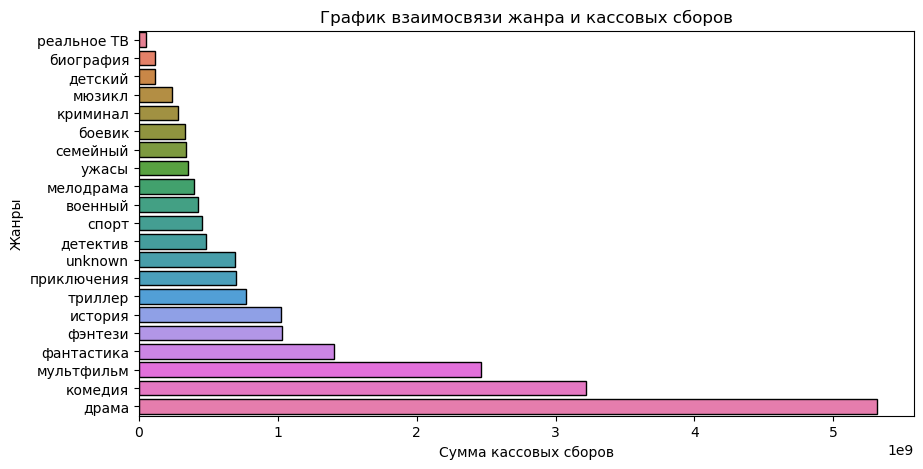

In [150]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости количества дней в продаже от дня недели, в который разместили объявление.
sns.barplot(
    data = data_genres.sort_values(by='sum'), y = 'main_genres', x = 'sum', palette = 'husl', 
    ec = 'black').set(
    title = 'График взаимосвязи жанра и кассовых сборов')
plt.xlabel('Сумма кассовых сборов')
plt.ylabel('Жанры');

Определенно да, взаимосвязь существует. Лидируют драма, комедия, мультфильм, фантастика (можно объединить с фэнтези) и исторические фильмы.

In [151]:
# Посмотрим, окупаются ли фильмы, в которые было больше всего вложено гос. средств, в прокате.
data_support[['sum_support', 'box_office']].sort_values(by = 'sum_support', ascending = False).head(10)

,sum_support,box_office
index,,
7474,500000000.0,NaN
7464,500000000.0,717703185.5
3351,450000000.0,364285139.6
2920,442104482.0,1402255390.0
5653,400000000.0,2779686144.0
5569,350000000.0,590405065.0
3453,300000000.0,337069662.8
5437,300000000.0,511775548.0
6887,300000000.0,55876887.4


По фильму с максимальным гос. бюджетом нет данных, был ли он выпущен в прокат... и режиссер у него Федор Бондарчук, а рейтинг всего 5,7 баллов. Посмотрим срез данных, где кассовые сборы больше вложенных средств.

In [152]:
data_support.query('box_office > sum_support')

,refundable_support,nonrefundable_support,sum_support,budget,box_office,financing_source,main_genres,main_director,ratings,realise_year
index,,,,,,,,,,
1870,50000000.0,100000000.0,150000000.0,220588394.0,249166767.7,Фонд кино,драма,Р.Давлетьяров,8.5,2015
1903,0.0,75000000.0,75000000.0,139551503.0,352804320.4,Фонд кино,триллер,А.Войтинский,7.0,2015
1987,26000000.0,30000000.0,56000000.0,80000000.0,121225633.8,Фонд кино,семейный,Максим Свешников,5.0,2014
1997,0.0,25000000.0,25000000.0,70876172.0,43534847.1,Фонд кино,фантастика,А.Пиманов,6.6,2014
2005,30000000.0,40000000.0,70000000.0,252489571.0,313489846.5,Фонд кино,мультфильм,А.Цицилин,6.5,2014
...,...,...,...,...,...,...,...,...,...,...
7330,0.0,60000000.0,60000000.0,360054850.0,114090162.7,Министерство культуры,биография,В.Чигинский,6.9,2019
7453,80000000.0,40000000.0,120000000.0,270000000.0,387590521.7,Фонд кино,мультфильм,В.Бедошвили,7.5,2019
7456,25000000.0,35000000.0,60000000.0,160000000.0,3073568690.8,Фонд кино,комедия,К.Шипенко,6.8,2019


In [153]:
# Посмотрим еще раз на режиссеров, но со сстороны не финансирования, а кассовости фильмов.
data_support.query('box_office > sum_support')['main_director'].value_counts().head(25)

С.Андреасян                               4
Д.Дьяченко                                4
Д.Шмидт                                   3
Т.Бекмамбетов                             2
Р.Гигинеишвили                            2
М.Расходников                             2
А.Богуславский                            2
А.Волгин                                  2
В.Тодоровский                             2
Л.Марголин                                2
Н.Хомерики                                2
Д.Киселев                                 2
С.Подгаевский                             2
М.Волков                                  2
В.Ровенский                               2
К.Дружинин                                2
К.Шипенко                                 2
С.Мокрицкий                               2
А.Пиманов                                 2
А.Цицилин                                 2
А.Меликян                                 2
А.Аксененко                               2
Р.Прыгунов                      

Мы видим, что в списке кассовых режиссеров есть несколько фамилий из списка тех, кому было выделено больше всего средств из гос.поддержки, но это не те, которые у всех на слуху, по крайней мере у таких далеких от кино, как я:) Получается, что деньги выделяют медийно известным личностям, делают на них ставку, но это совсем не гарантия высоких кассовых сборов.

In [154]:
# Посмотрим есть ли взаимосвязь между окупаемостью и рейстингом на Кинопоиске.
data_support[['ratings', 'box_office']].sort_values(by = 'box_office', ascending = False)

,ratings,box_office
index,,
7456,6.8,3073568690.8
5653,7.5,2779686144.0
6549,6.5,2271754004.5
5505,6.8,1655037688.0
5708,NaN,1445731797.9
...,...,...
7229,6.6,NaN
7344,NaN,NaN
7474,5.7,NaN


In [155]:
# Найдем минимальное и максимальное значение для стобца box_office. Они понадобятся, чтобы задать границы по оси y графика ниже.
print(data_support['box_office'].min())
print()
print(data_support['box_office'].max())

1550.0

3073568690.79


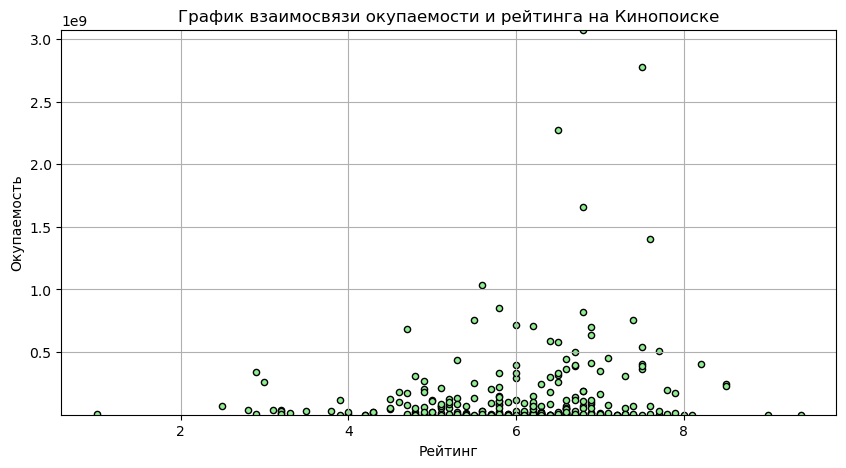

In [156]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму рассеяния.
data_support.plot(kind = 'scatter', x = 'ratings', y = 'box_office', ec = 'black', c = 'lightgreen').set(
    title = 'График взаимосвязи окупаемости и рейтинга на Кинопоиске')
plt.ylabel('Окупаемость')
plt.xlabel('Рейтинг')
plt.ylim(1550, 3073568690.79)
plt.grid();

Судя по всему зависимости нет. На диаграмме мы видим, что большинство значений лежат в интервале между 4 и 8 баллами. Высокий рейтинг не гарантирует высокие кассовые сборы и наоборот. Кассовые сборы вне зависимости от рейтинга зачастую делаются посредством маркетингового продвижения, пиара, медийности режиссера, актерского состава и тд. Именно эти факторы первично побуждают людей идти на фильм в кино, а понравится или нет, и какой балл они потом поставят (если поставят) на Кинопоиске уже вторичный момент.

**Вывод:**

На данном этапе мы проверили несколько гипотез и сделали следующие выводы:
- больше всего средств в российское кино вкладывает Фонд кино. За исследуемый период времени было потрачено около 14.2 млрд. рублей, а вернулось всего 3.6 млрд. рублей. Министерство культуры при финансировании без участия Фонда кино вообще не имеет возвратных средств;
- финансирование в какой-то степени определенно зависит от медийной известности и заслуг режиссера, что не является гарантией высокого рейтинга и высоких кассовых сборов;
- охотнее всего средства выделяются на фильмы в жанрах драма, комедия, мультфильм, фэнтези, история;
- окупаемость фильмов вряд ли зависит от его финансирования. Фильмы, имеющие гос. поддержку окупились менее, чем в  50% случаев;
- взаимосвязи между  окупаемостью и рейтингом на Кинопоиске нет.

### Шаг 5. Напишем общий вывод

**Общий вывод:**

Мы провели ислледование данных о российском кинопрокате.

Выявили следующие тренды:
- Количество взрослых людей, посещающих кинотеатры растет год от года;
- Киноиндустрия в большей степени ориентирована на выпуск фильмов для возрастных категорий 16+ и 18 + и мультфильмов для категории 6+, но категория 18+ пока не оправдывает вложения в нее по объему кассовых сборов;
- Максимальная прибыль от кассовых сборов была получена в 2018 году, минимальная в 2010 году. Прослеживается взаимосвязь между количеством фильмов, вышедших в прокат и кассой. Больше фильмов - больше касса. Но эта зависимость поднимает вопрос качества, больше ведь не значит лучше;
- Государственное финансирование составляет в среднем 61.4% от общего бюджета фильмов, снятых с гос. поддержкой, но окупаемость  составляет меньше трети от вложенного;
- Самые популярные жанры кино: драма, комедия, мультфильм, фэнтези, исторические фильмы, на них выделяется больше всего средств;
- Теория "больше вложил, больше получил" не работает. От суммы финансирования результат по окупаемости не зависит;
- Часто ставка делается на известность режиссера, но не всегда или даже так же часто этот прием не срабатывает, и фильм проваливается в прокате;
- Рейтинги на Кинопоиске и кассовые сборы  не взаимосвязаны.